## 1 Driver and Constructor Performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")
constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
driver_standings = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/driver_standings.csv")

# Merge datasets
merged_df = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']]
merged_df = merged_df.merge(races[['raceId', 'year']], on='raceId')

# Compute Driver Performance Metrics
driver_stats = merged_df.groupby('driverId').agg(
    total_races=('raceId', 'count'),
    total_wins=('positionOrder', lambda x: (x == 1).sum()),
    total_podiums=('positionOrder', lambda x: (x <= 3).sum()),
    total_points=('points', 'sum')
).reset_index()
driver_stats['win_ratio'] = driver_stats['total_wins'] / driver_stats['total_races']
driver_stats['podium_ratio'] = driver_stats['total_podiums'] / driver_stats['total_races']

# Compute Career Longevity
driver_career = merged_df.groupby('driverId').agg(
    first_race=('year', 'min'),
    last_race=('year', 'max')
).reset_index()
driver_career['career_length'] = driver_career['last_race'] - driver_career['first_race']

driver_stats = driver_stats.merge(driver_career, on='driverId')

# Compute Constructor Performance Metrics
constructor_stats = merged_df.groupby('constructorId').agg(
    total_races=('raceId', 'count'),
    total_wins=('positionOrder', lambda x: (x == 1).sum()),
    total_podiums=('positionOrder', lambda x: (x <= 3).sum()),
    total_points=('points', 'sum')
).reset_index()
constructor_stats['win_ratio'] = constructor_stats['total_wins'] / constructor_stats['total_races']
constructor_stats['podium_ratio'] = constructor_stats['total_podiums'] / constructor_stats['total_races']


# Save Results
driver_stats.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/driver_performance.csv", index=False)
constructor_stats.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/constructor_performance.csv", index=False)

print("Driver and Constructor performance metrics saved.")

print("\n✅ Driver Performance Metrics Saved: 'driver_performance.csv'")
print(driver_stats.head(10))  # Print first 10 rows for verification

print("\n✅ Constructor Performance Metrics Saved: 'constructor_performance.csv'")
print(constructor_stats.head(10))

Driver and Constructor performance metrics saved.

✅ Driver Performance Metrics Saved: 'driver_performance.csv'
   driverId  total_races  total_wins  total_podiums  total_points  win_ratio  \
0         1          356         105            202        4820.5   0.294944   
1         2          184           0             13         259.0   0.000000   
2         3          206          23             57        1594.5   0.111650   
3         4          404          32            106        2329.0   0.079208   
4         5          112           1              4         105.0   0.008929   
5         6           36           0              0           9.0   0.000000   
6         7           27           0              0           6.0   0.000000   
7         8          352          21            103        1873.0   0.059659   
8         9           99           1             12         274.0   0.010101   
9        10           95           0              3          51.0   0.000000   

   podi

## 2 Qualifying vs. Race Performance

In [ ]:
import pandas as pd
# Load datasets
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
# Merge necessary columns
performance_df = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']]
performance_df = performance_df.merge(races[['raceId', 'year']], on='raceId')
# Calculate position change
performance_df['positions_gained'] = performance_df['grid'] - performance_df['positionOrder']
# Save the merged dataset for visualization
performance_df.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/qualifying_vs_race_performance.csv", index=False)
print("Merged dataset saved as qualifying_vs_race_performance.csv")
constructor_results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructor_results.csv")
driver_standings = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/driver_standings.csv")
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")  # Load drivers to include names
# Merge datasets
merged_df = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder']]
merged_df = merged_df.merge(races[['raceId', 'year']], on='raceId')
merged_df = merged_df.merge(drivers[['driverId', 'driverRef']], on='driverId')
# Filter only races where a driver finished in the top 3 (podium)
podium_finishes = merged_df[merged_df['positionOrder'] <= 3]
# Identify top 5 grid positions leading to podium finishes for each driver
favorite_grids = (
    podium_finishes.groupby(['driverId', 'driverRef', 'grid'])
    .size()
    .reset_index(name='podium_count')
)
# Select top 5 most successful grid positions per driver
favorite_grids = (
    favorite_grids.sort_values(['driverId', 'podium_count'], ascending=[True, False])
    .groupby('driverId')
    .head(5)
)
# Save to CSV
favorite_grids.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/favorite_grids_for_drivers.csv", index=False)
print("Favorite starting grid positions(Top5) for each driver saved to favorite_grids_for_drivers.csv")


print(favorite_grids.head(10))

Merged dataset saved as qualifying_vs_race_performance.csv
Favorite starting grid positions(Top5) for each driver saved to favorite_grids_for_drivers.csv
    driverId driverRef  grid  podium_count
0          1  hamilton     1            85
1          1  hamilton     2            56
2          1  hamilton     3            22
3          1  hamilton     4            14
4          1  hamilton     5             7
18         2  heidfeld     5             3
22         2  heidfeld    10             3
19         2  heidfeld     6             2
15         2  heidfeld     1             1
16         2  heidfeld     2             1


## 3 Pit Stop Strategies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Load datasets
constructor_results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructor_results.csv")
driver_standings = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/driver_standings.csv")
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
pit_stops = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/pit_stops.csv")
drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")



# Merge datasets
merged_df = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']]
merged_df = merged_df.merge(constructor_results[['raceId', 'constructorId', 'points']], on=['raceId', 'constructorId'], suffixes=('', '_constructor'), how='left')
merged_df.rename(columns={'points_constructor': 'points_constructor'}, inplace=True)

merged_df = merged_df.merge(driver_standings[['raceId', 'driverId', 'points']], on=['raceId', 'driverId'], suffixes=('', '_driver'), how='left')
merged_df.rename(columns={'points_driver': 'points_driver'}, inplace=True)

merged_df = merged_df.merge(races[['raceId', 'year']], on='raceId', how='left')
merged_df = merged_df.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Ensure correct 'points' column from results.csv is retained
merged_df.rename(columns={'points': 'points_race'}, inplace=True)

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
merged_df[['grid', 'points_constructor', 'points_driver']] = imputer.fit_transform(merged_df[['grid', 'points_constructor', 'points_driver']])

# Analyze pit stop impact
pit_analysis = pit_stops.groupby(['raceId', 'driverId']).agg(
    total_pit_stops=('stop', 'count'),
    avg_pit_time=('milliseconds', 'mean')
).reset_index()

# Merge with race results
data_with_pitstops = merged_df.merge(pit_analysis, on=['raceId', 'driverId'], how='left')
data_with_pitstops['total_pit_stops'].fillna(0, inplace=True)
data_with_pitstops['avg_pit_time'].fillna(0, inplace=True)

# Remove rows where total pit stops is zero
data_with_pitstops = data_with_pitstops[data_with_pitstops['total_pit_stops'] > 0]

# Save analysis file
data_with_pitstops[['raceId', 'driverId', 'surname', 'grid', 'positionOrder', 'total_pit_stops', 'avg_pit_time', 'points_race']].to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/pit_stop_analysis.csv", index=False)

print("Pit Stop Analysis saved to pit_stop_analysis.csv")


Pit Stop Analysis saved to pit_stop_analysis.csv


<ipython-input-10-49dfdf4d0ec3>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_with_pitstops['total_pit_stops'].fillna(0, inplace=True)
<ipython-input-10-49dfdf4d0ec3>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

## 4 Head-to-Head Driver Analysis

In [ ]:
import pandas as pd

# Load datasets
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")

# Select required columns
race_results = results[['raceId', 'driverId', 'positionOrder']]
race_results = race_results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Sort by race and finishing position
race_results = race_results.sort_values(by=['raceId', 'positionOrder'])

# Initialize head-to-head records
head_to_head = []

# Compare each driver against all others in the same race
for race_id, group in race_results.groupby('raceId'):
    drivers = group[['driverId', 'surname', 'positionOrder']].values
    for i in range(len(drivers)):
        for j in range(i + 1, len(drivers)):  # Compare each driver to others
            driver_a, name_a, pos_a = drivers[i]
            driver_b, name_b, pos_b = drivers[j]

            winner = driver_a if pos_a < pos_b else driver_b
            loser = driver_b if pos_a < pos_b else driver_a

            head_to_head.append([race_id, driver_a, name_a, driver_b, name_b, winner])

# Convert to DataFrame
head_to_head_df = pd.DataFrame(head_to_head, columns=['raceId', 'driverA', 'nameA', 'driverB', 'nameB', 'winner'])

# Count wins for each driver matchup
head_to_head_summary = head_to_head_df.groupby(['driverA', 'nameA', 'driverB', 'nameB'])['winner'].value_counts().unstack(fill_value=0)

# Add total races between pairs
head_to_head_summary['total_races'] = head_to_head_summary.sum(axis=1)

# Save the analysis
head_to_head_summary.reset_index(inplace=True)
head_to_head_summary.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/head_to_head.csv", index=False)

print("Head-to-Head Analysis is Done.Extracting Rivalries")

head_to_head = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/head_to_head.csv")

# Identify win counts (excluding unnecessary columns)
win_columns = [col for col in head_to_head_summary.columns if col not in ['driverA', 'nameA', 'driverB', 'nameB']]
head_to_head_summary['wins_driverA'] = head_to_head_summary[win_columns].sum(axis=1)

# Create a copy where driver pairs are flipped
flipped = head_to_head_summary.rename(columns={'driverA': 'driverB', 'nameA': 'nameB',
                                               'driverB': 'driverA', 'nameB': 'nameA',
                                               'wins_driverA': 'wins_driverB'})

# Merge A vs B with B vs A
rivalries = head_to_head_summary.merge(flipped, on=['driverA', 'nameA', 'driverB', 'nameB'], how='left')

# Fill missing values (where there was only one-sided data)
rivalries['wins_driverB'].fillna(0, inplace=True)

# Calculate total races & win ratio
rivalries['total_races'] = rivalries['wins_driverA'] + rivalries['wins_driverB']
rivalries['win_ratio_A'] = rivalries['wins_driverA'] / rivalries['total_races']

# Keep only relevant columns
rivalries = rivalries[['driverA', 'nameA', 'driverB', 'nameB', 'wins_driverA', 'wins_driverB', 'total_races', 'win_ratio_A']]

rivalries = rivalries[rivalries['driverA'] < rivalries['driverB']]
rivalries_cleaned = rivalries[(rivalries['wins_driverA'] > 0) & (rivalries['wins_driverB'] > 0)]
rivalries_cleaned.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/rivalries.csv", index=False)
import os
os.remove('/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/head_to_head.csv')
competitive_rivalries = rivalries[
    (rivalries['wins_driverA'] > 0) &
    (rivalries['wins_driverB'] > 0) &
    (rivalries['total_races'] > 200)
]

# Calculate how close the win ratio is to 0.5
competitive_rivalries['ratio_diff'] = abs(competitive_rivalries['win_ratio_A'] - 0.5)

# Sort by closest to 0.5
closest_rivalries = competitive_rivalries.sort_values(by='ratio_diff', ascending=True)

# Select the top 10
top_10_rivalries = closest_rivalries.head(10)


print("The Top 10 Rivalries based on defined parameters :")
# Print results
print(top_10_rivalries[['nameA',  'nameB', 'total_races','win_ratio_A']])



Head-to-Head Analysis is Done.Extracting Rivalries
The Top 10 Rivalries based on defined parameters :
winner      nameA        nameB  total_races  win_ratio_A
9589      Laffite       Watson        280.0     0.500000
988        Trulli       Webber        352.0     0.500000
9579      Laffite      Rosberg        240.0     0.500000
1223       Button  Barrichello        420.0     0.500000
919     Coulthard     Häkkinen        244.0     0.500000
837         Massa    Ricciardo        256.0     0.500000
5237      Martini     Alboreto        220.0     0.500000
2767     Frentzen        Alesi        256.0     0.500000
787         Massa       Button        502.0     0.498008
541     Räikkönen    Ricciardo        390.0     0.502564


<ipython-input-11-d5c4ed8b5e39>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rivalries['wins_driverB'].fillna(0, inplace=True)
<ipython-input-11-d5c4ed8b5e39>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competitive_rivalries['ratio_diff'] = abs(competitive_rivalries['win_ratio

## 5 Hypothetical Driver Swaps

Enter the season year: 2021
Enter Driver A name: Hamilton
Enter Driver B name: Alonso


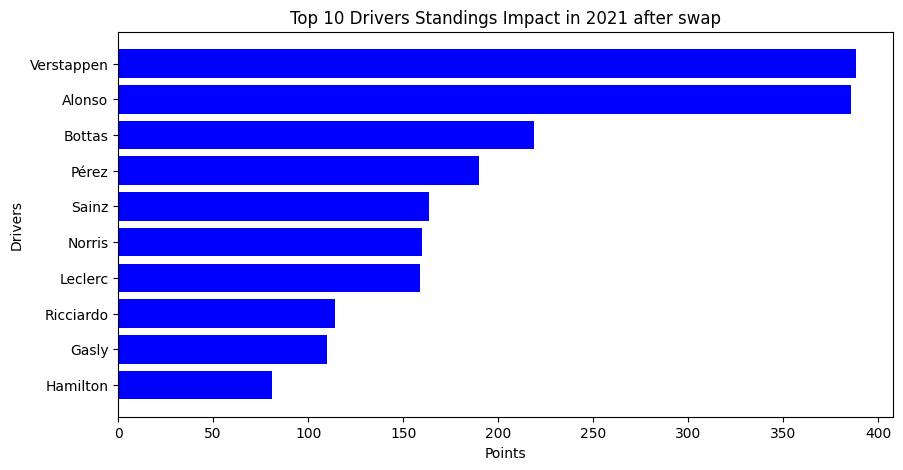

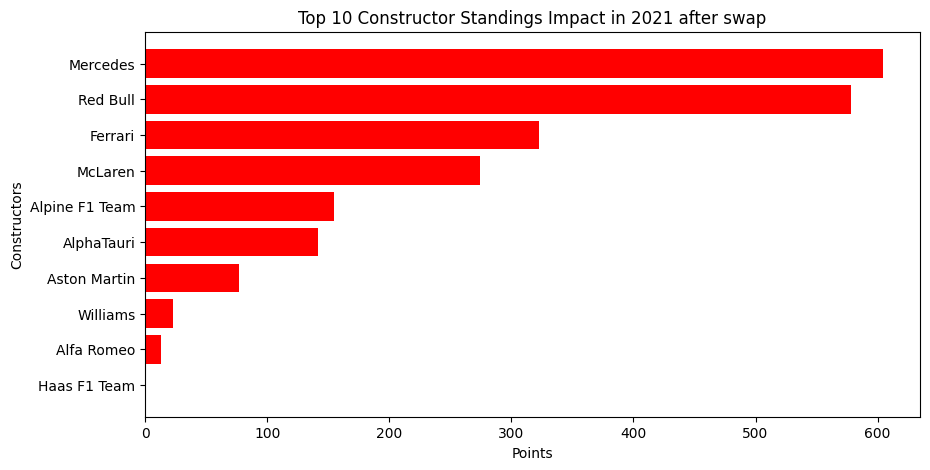

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")
constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")

# Take input from user
season = int(input("Enter the season year: "))
driver_A_name = input("Enter Driver A name: ")
driver_B_name = input("Enter Driver B name: ")

# Get driver IDs
driver_A = drivers[drivers['surname'] == driver_A_name]['driverId'].values[0]
driver_B = drivers[drivers['surname'] == driver_B_name]['driverId'].values[0]

# Get races for the chosen season
season_races = races[races['year'] == season]['raceId']

# Filter race results for the chosen season
season_results = results[results['raceId'].isin(season_races)].copy()

# Swap results between the two drivers
mask_A = season_results['driverId'] == driver_A
mask_B = season_results['driverId'] == driver_B
season_results.loc[mask_A, 'driverId'] = driver_B
season_results.loc[mask_B, 'driverId'] = driver_A

# Recalculate driver standings
driver_standings = season_results.groupby('driverId')['points'].sum().reset_index()
driver_standings = driver_standings.merge(drivers[['driverId', 'surname']], on='driverId')
driver_standings = driver_standings.sort_values(by='points', ascending=False)

# Recalculate constructor standings
constructor_standings = season_results.groupby('constructorId')['points'].sum().reset_index()
constructor_standings = constructor_standings.merge(constructors[['constructorId', 'name']], on='constructorId')
constructor_standings = constructor_standings.sort_values(by='points', ascending=False)

# Plot Driver Standings Impact
plt.figure(figsize=(10, 5))
plt.barh(driver_standings['surname'].head(10), driver_standings['points'].head(10), color='blue')
plt.xlabel("Points")
plt.ylabel("Drivers")
plt.title(f"Top 10 Drivers Standings Impact in {season} after swap")
plt.gca().invert_yaxis()
plt.show()

# Plot Constructor Standings Impact
plt.figure(figsize=(10, 5))
plt.barh(constructor_standings['name'].head(10), constructor_standings['points'].head(10), color='red')
plt.xlabel("Points")
plt.ylabel("Constructors")
plt.title(f"Top 10 Constructor Standings Impact in {season} after swap")
plt.gca().invert_yaxis()
plt.show()


## 5b Hypothetical Driver Swaps:

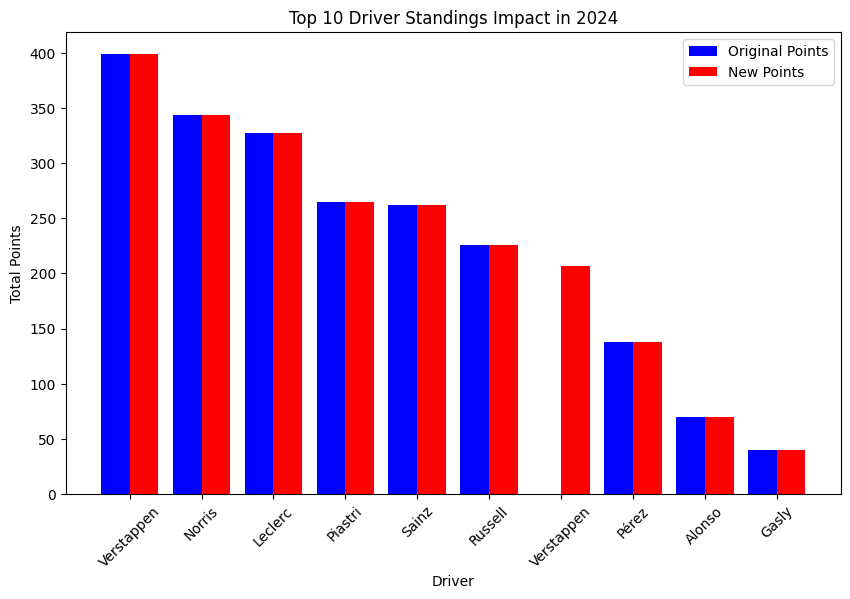

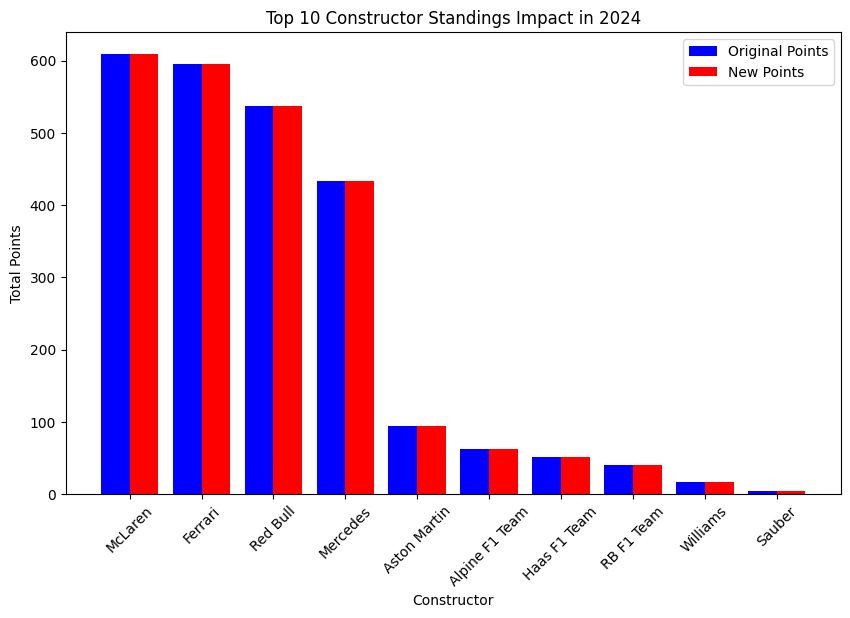

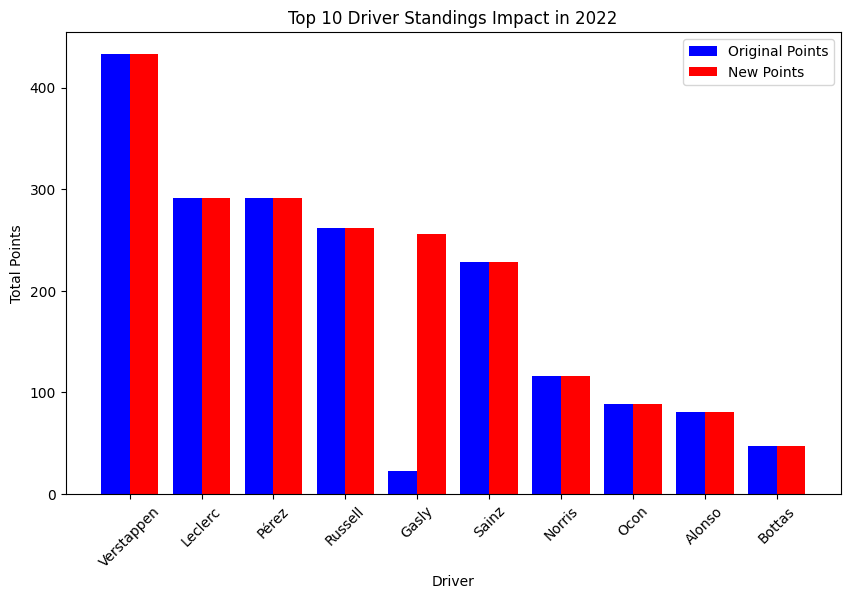

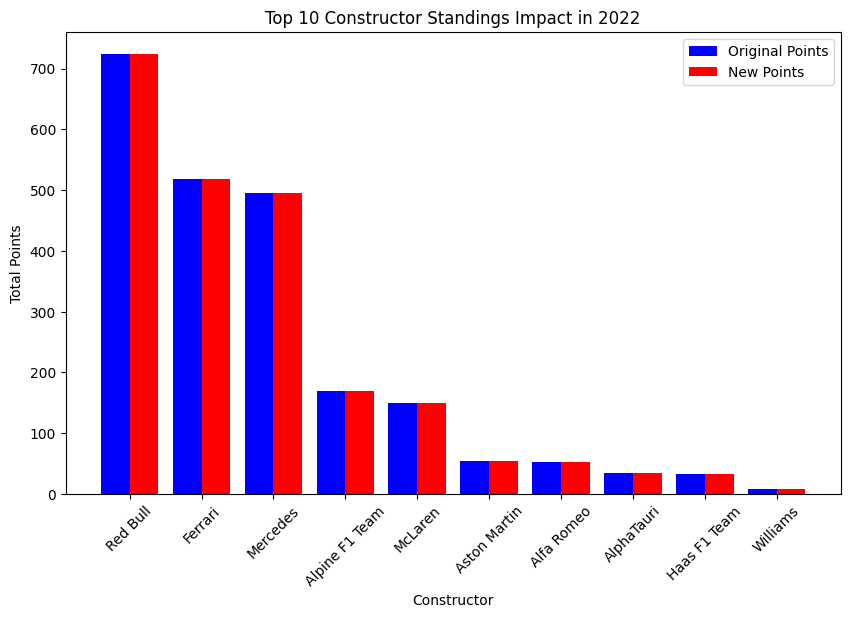

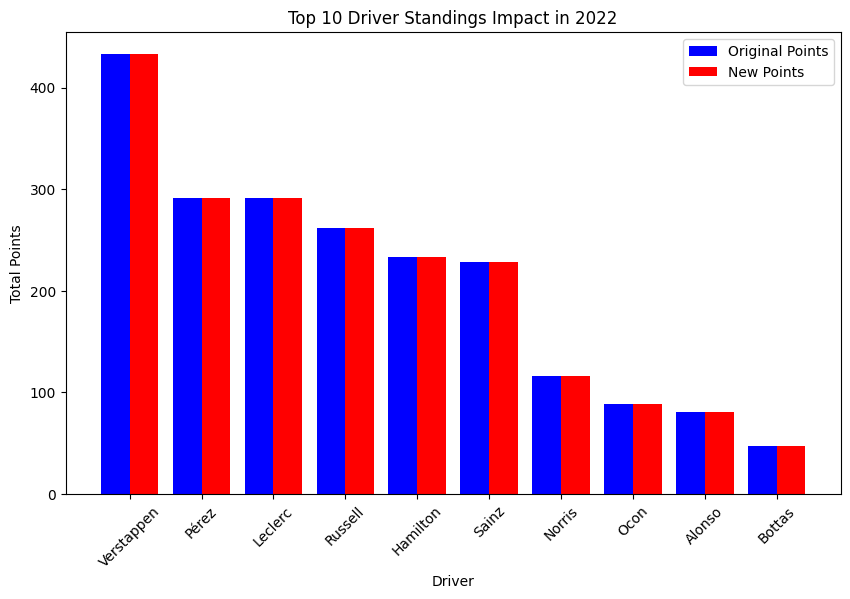

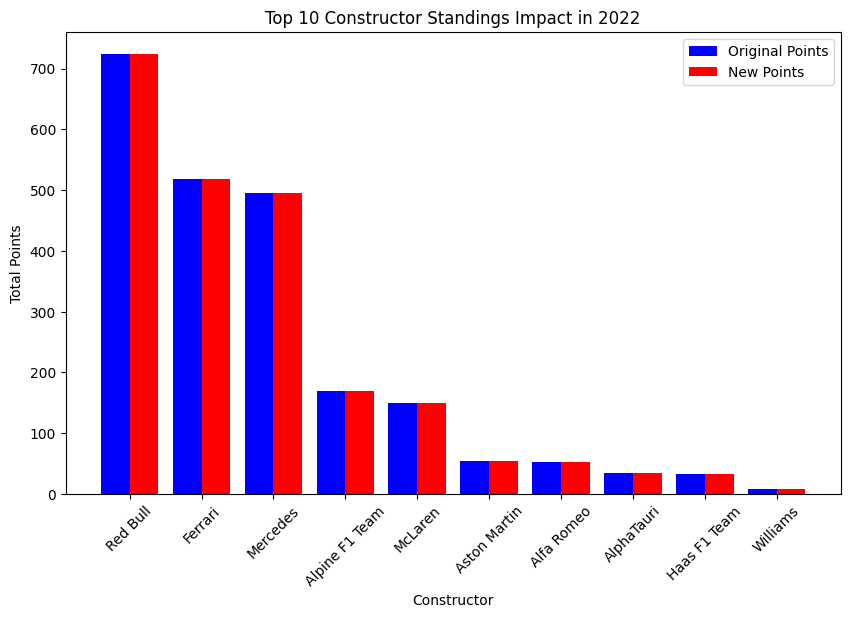

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def simulate_driver_swap(driver1, driver2, season):
    # Load data
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
    standings = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/driver_standings.csv")

    # Filter data for the selected season
    season_races = races[races['year'] == season]
    season_results = results[results['raceId'].isin(season_races['raceId'])]

    # Get driver IDs
    driver1_id = drivers[drivers['surname'] == driver1]['driverId'].values[0]
    driver2_id = drivers[drivers['surname'] == driver2]['driverId'].values[0]

    # Swap drivers in the results data
    swapped_results = season_results.copy()
    swapped_results.loc[swapped_results['driverId'] == driver1_id, 'driverId'] = driver2_id
    swapped_results.loc[swapped_results['driverId'] == driver2_id, 'driverId'] = driver1_id

    # Recalculate driver standings
    original_driver_points = season_results.groupby('driverId')['points'].sum()
    swapped_driver_points = swapped_results.groupby('driverId')['points'].sum()

    # Recalculate constructor standings
    original_constructor_points = season_results.groupby('constructorId')['points'].sum()
    swapped_constructor_points = swapped_results.groupby('constructorId')['points'].sum()

    # Merge driver names
    driver_points_df = pd.DataFrame({
        'Original Points': original_driver_points,
        'New Points': swapped_driver_points
    }).reset_index()
    driver_points_df = driver_points_df.merge(drivers[['driverId', 'surname']], on='driverId')
    driver_points_df = driver_points_df.sort_values(by='New Points', ascending=False).head(10)

    # Merge constructor names
    constructor_points_df = pd.DataFrame({
        'Original Points': original_constructor_points,
        'New Points': swapped_constructor_points
    }).reset_index()
    constructor_points_df = constructor_points_df.merge(constructors[['constructorId', 'name']], on='constructorId')
    constructor_points_df = constructor_points_df.sort_values(by='New Points', ascending=False).head(10)

    # Plot Driver Standings Comparison
    width = 0.4  # Adjust bar width for clear differentiation
    x = np.arange(len(driver_points_df['surname']))

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, driver_points_df['Original Points'], width=width, color='blue', label='Original Points')
    plt.bar(x + width/2, driver_points_df['New Points'], width=width, color='red', label='New Points')
    plt.xticks(ticks=x, labels=driver_points_df['surname'], rotation=45)
    plt.xlabel("Driver")
    plt.ylabel("Total Points")
    plt.title(f"Top 10 Driver Standings Impact in {season}")
    plt.legend()
    plt.show()

    # Plot Constructor Standings Comparison
    x = np.arange(len(constructor_points_df['name']))

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, constructor_points_df['Original Points'], width=width, color='blue', label='Original Points')
    plt.bar(x + width/2, constructor_points_df['New Points'], width=width, color='red', label='New Points')
    plt.xticks(ticks=x, labels=constructor_points_df['name'], rotation=45)
    plt.xlabel("Constructor")
    plt.ylabel("Total Points")
    plt.title(f"Top 10 Constructor Standings Impact in {season}")
    plt.legend()
    plt.show()

# Example Usage
simulate_driver_swap("Verstappen", "Hamilton", 2024)
simulate_driver_swap("Gasly", "Hamilton", 2022)
simulate_driver_swap("Stroll", "Verstappen", 2022)


## 6  Driver Movements & Team Networks

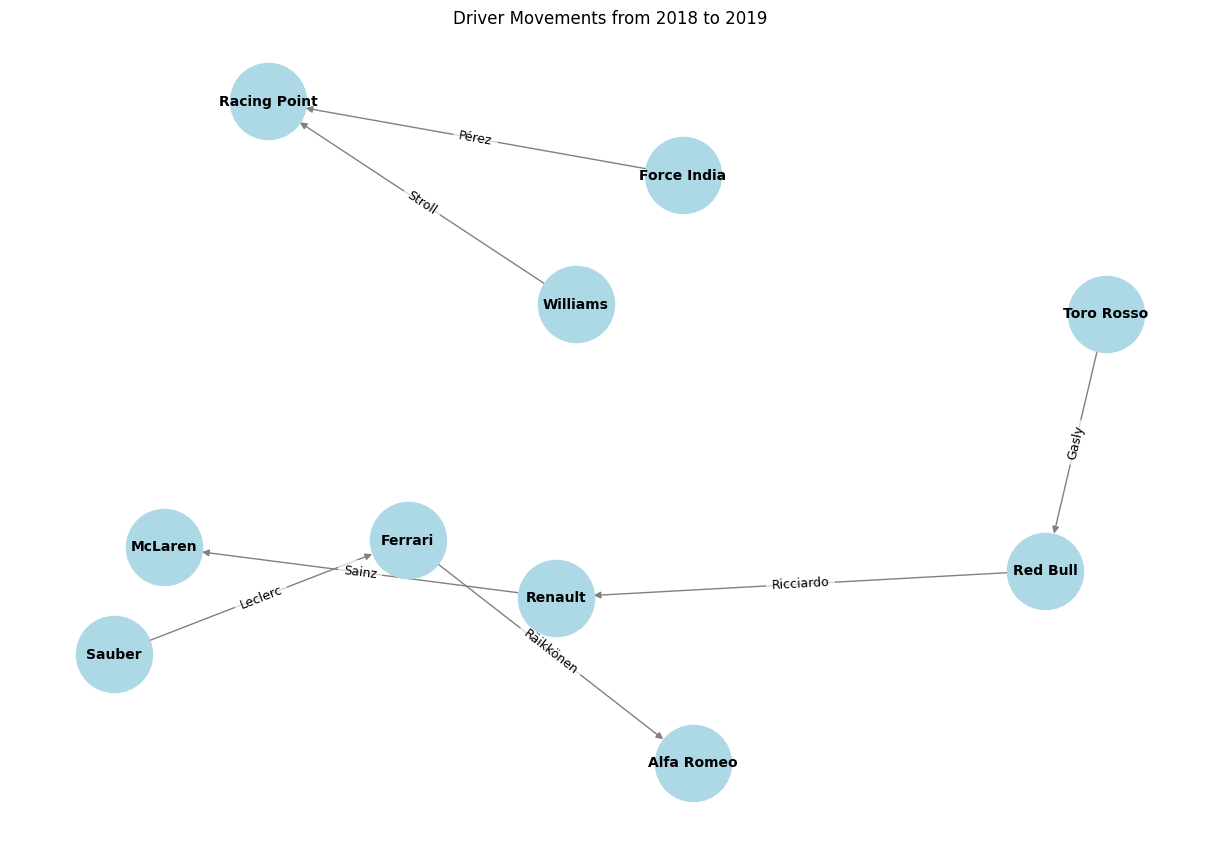

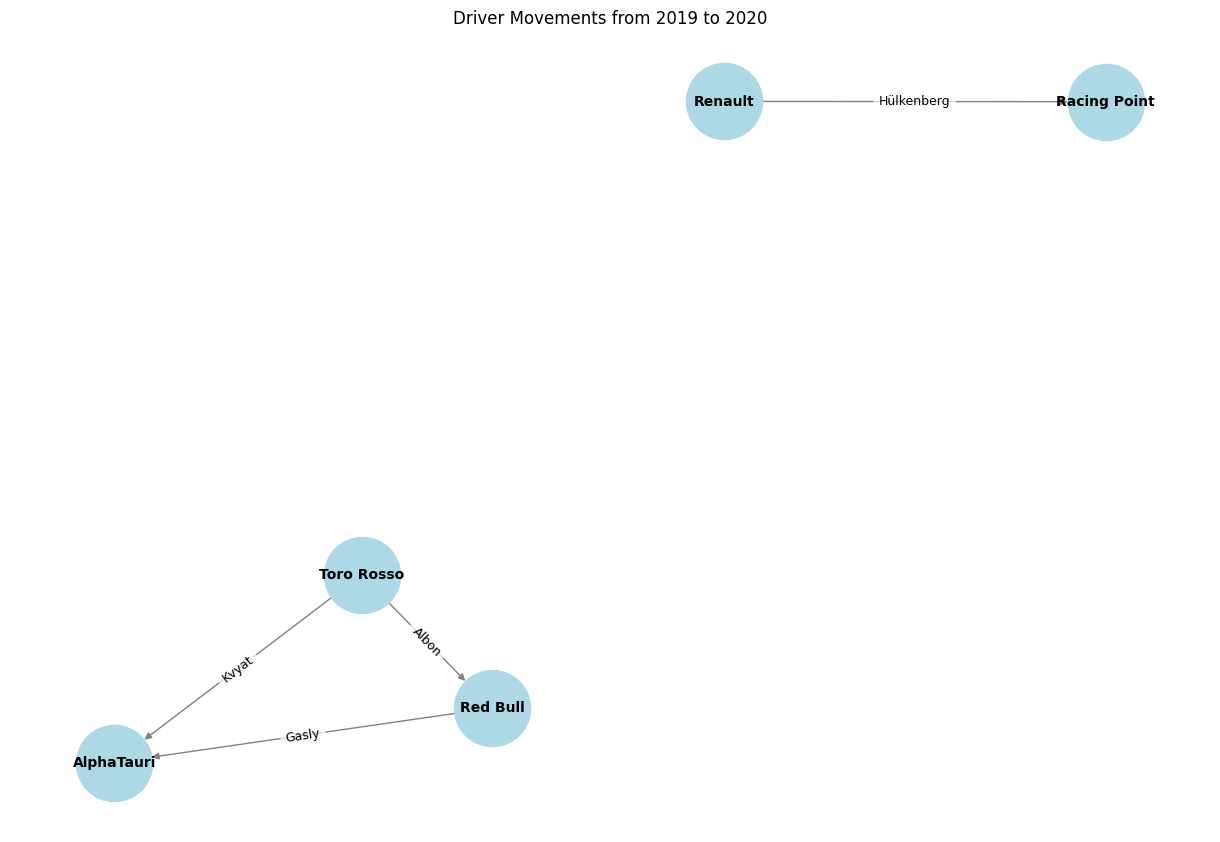

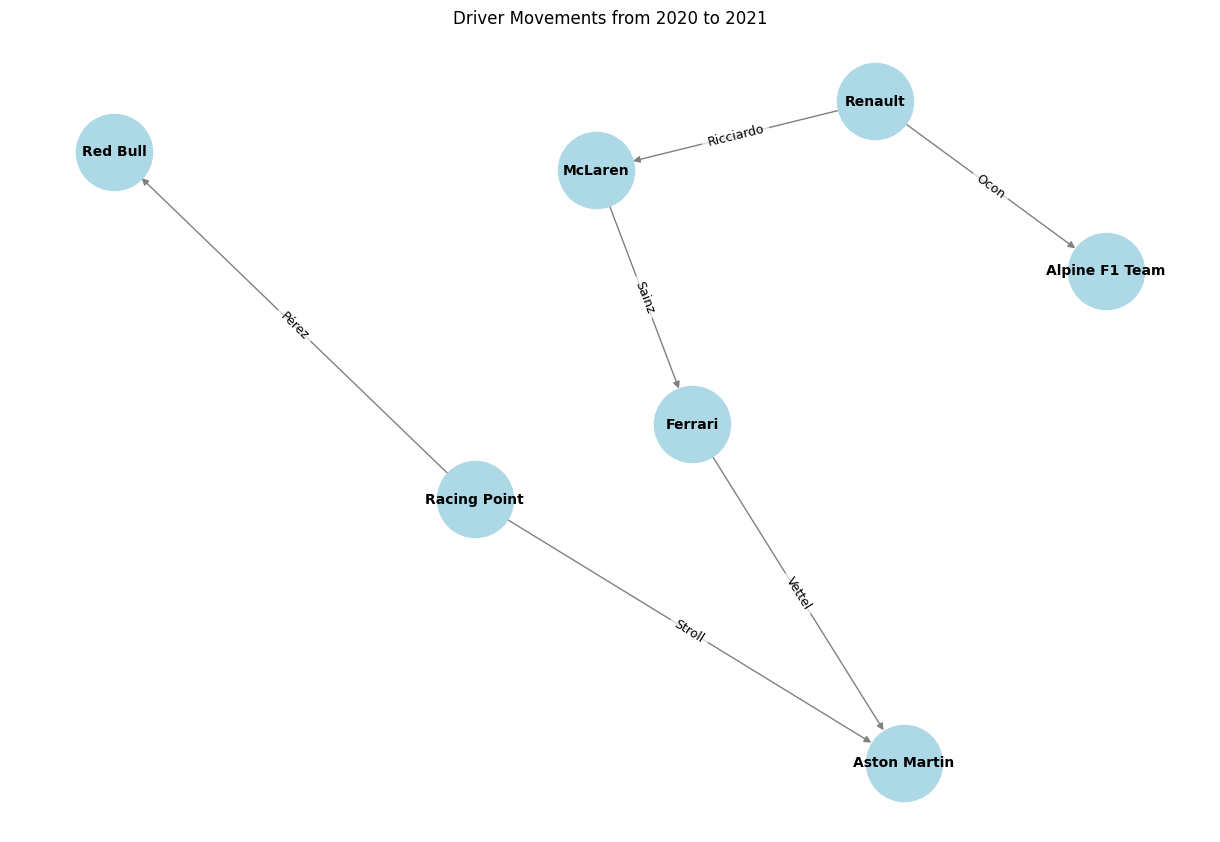

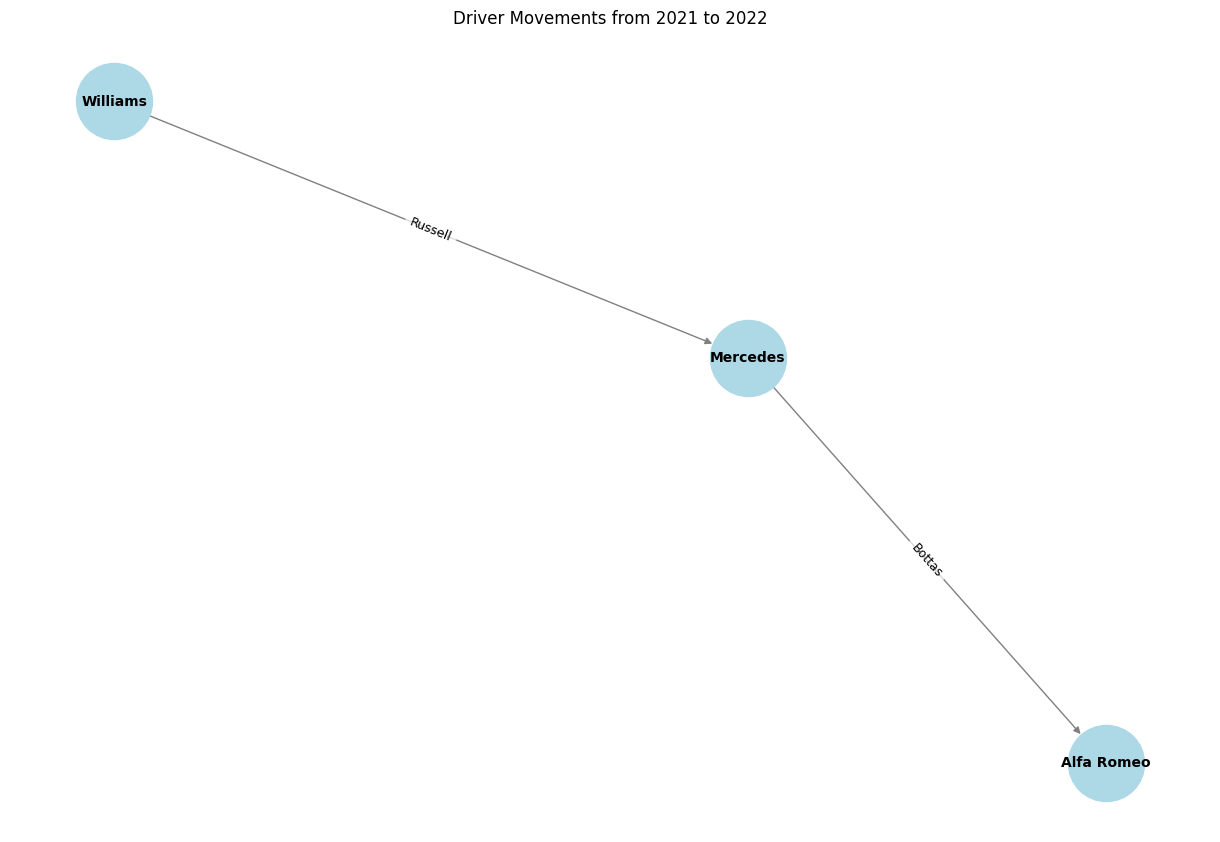

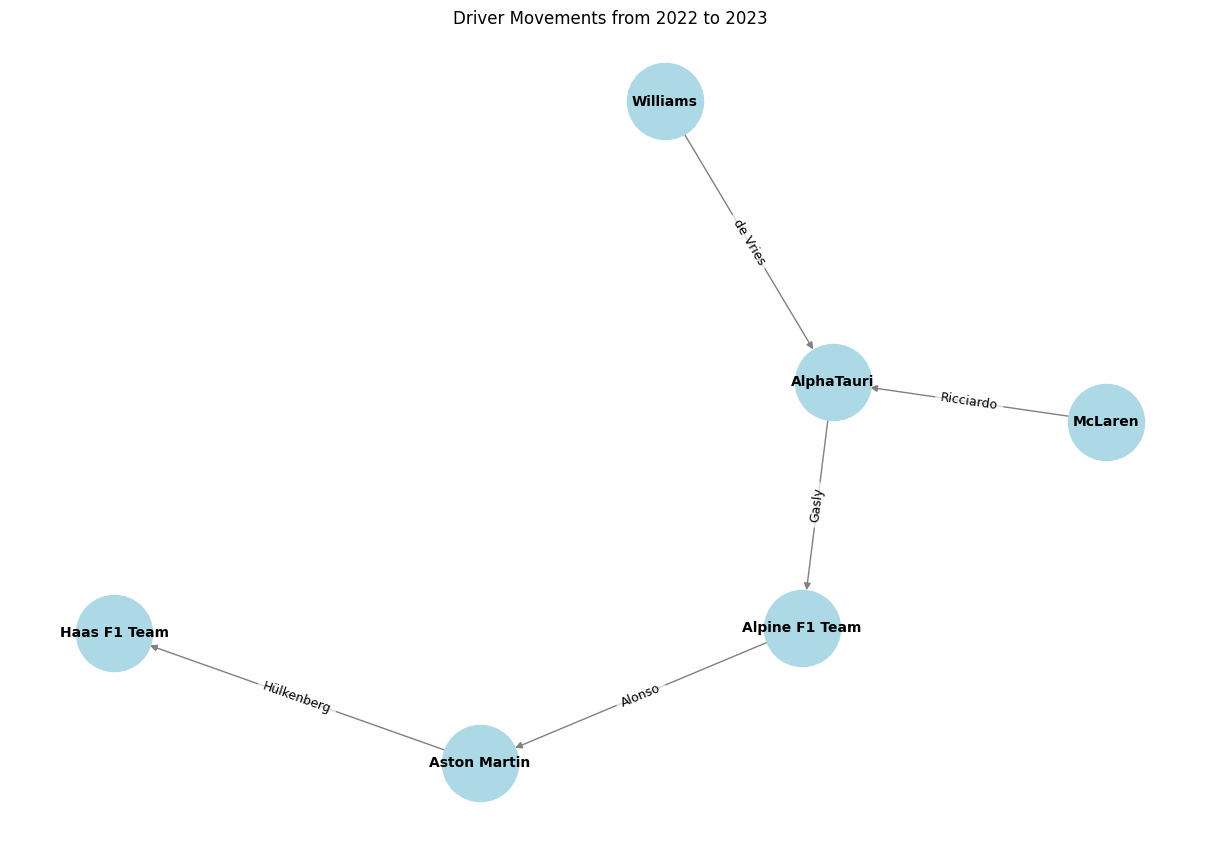

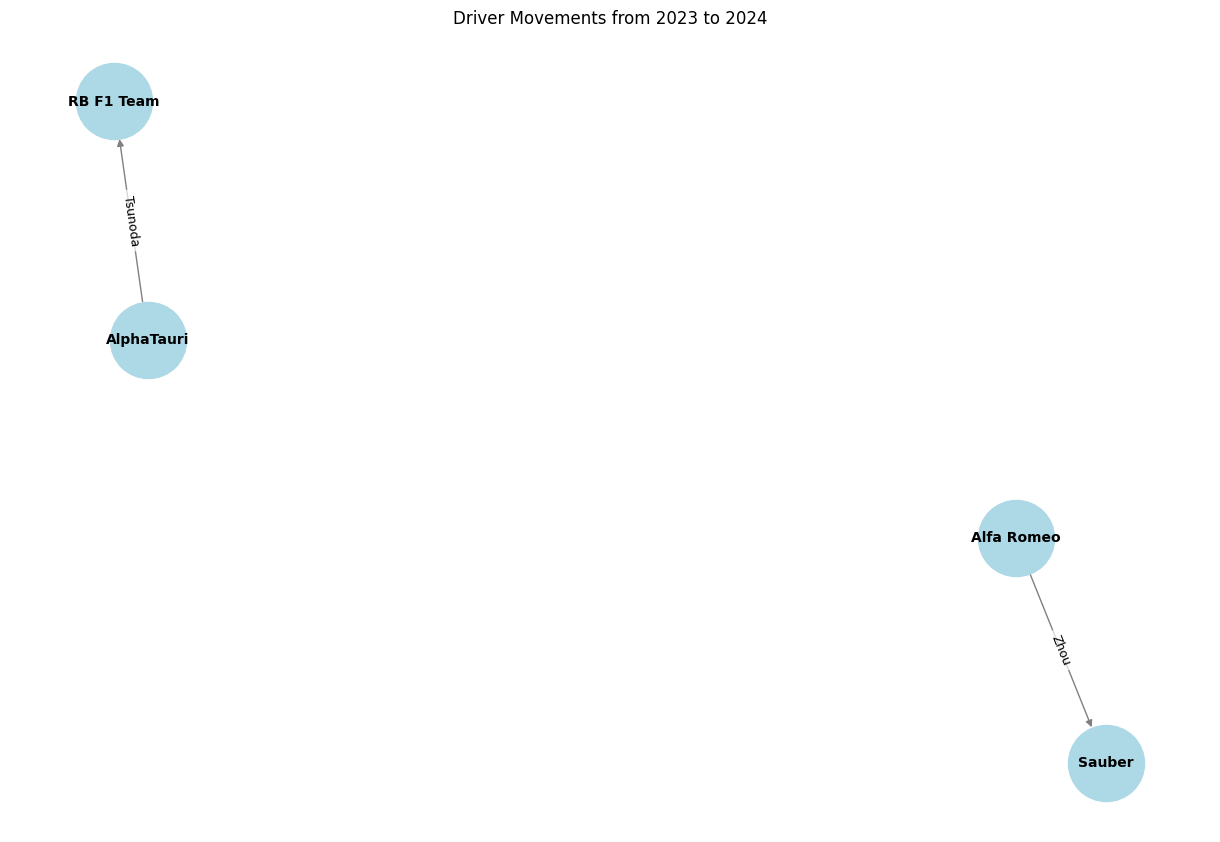

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def plot_driver_movements(start_season, end_season):
    # Load Data
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")

    # Merge results with race and driver details
    results = results.merge(races[['raceId', 'year']], on='raceId', how='left')
    results = results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
    results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

    # Filter for the selected seasons
    results = results[(results['year'] >= start_season) & (results['year'] <= end_season)]

    # Get unique driver-team pairings per season
    driver_team_season = results.groupby(['year', 'surname'])['name'].first().reset_index()

    # Identify transitions
    transitions = []
    for year in range(start_season, end_season):
        current_year = driver_team_season[driver_team_season['year'] == year]
        next_year = driver_team_season[driver_team_season['year'] == year + 1]
        merged = current_year.merge(next_year, on='surname', suffixes=('_old', '_new'))
        transitions.extend(merged[['surname', 'name_old', 'name_new']].values.tolist())

    # Create Network Graph
    G = nx.DiGraph()
    for driver, old_team, new_team in transitions:
        if old_team != new_team:  # Only consider actual team changes
            G.add_edge(old_team, new_team, label=driver)

    # Draw Graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42, k=0.8)  # Adjusted for better spacing
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight='bold')
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.title(f"Driver Movements from {start_season} to {end_season}")
    plt.savefig(f"/content/drive/MyDrive/Sem-8/Data Mining/Package/VISUALS/Transfer{start_season}to{end_season}.png", dpi=300)
    plt.show()

# Generate plots for required seasons
for start, end in [(2018, 2019), (2019, 2020), (2020, 2021), (2021, 2022), (2022, 2023), (2023, 2024)]:
    plot_driver_movements(start, end)


## 7 Team Performance Comparison

<ipython-input-15-1830eb6b3929>:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
<ipython-input-15-1830eb6b3929>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_podiums, x='name', y='Podium Finishes', palette='viridis')




Most successful team in 2021: Mercedes with 28 podiums




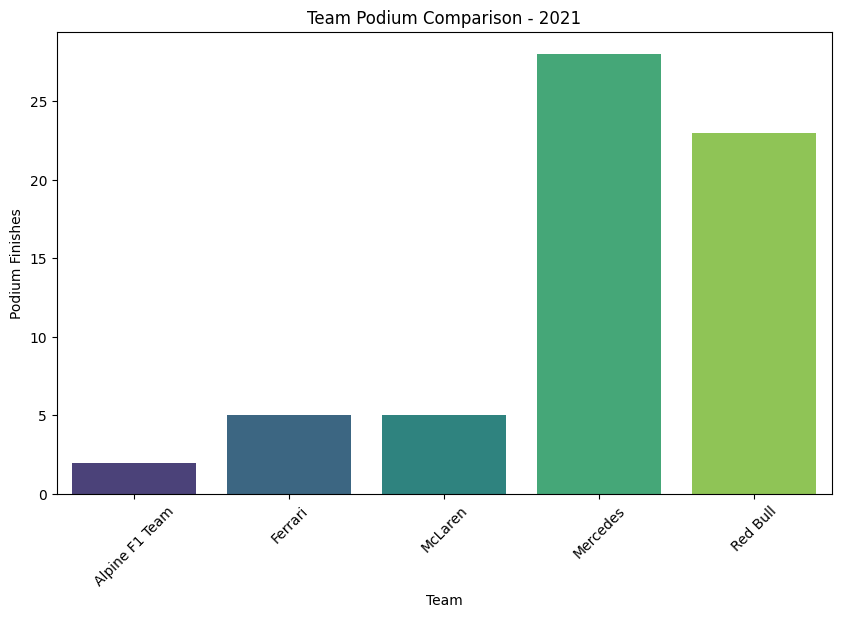

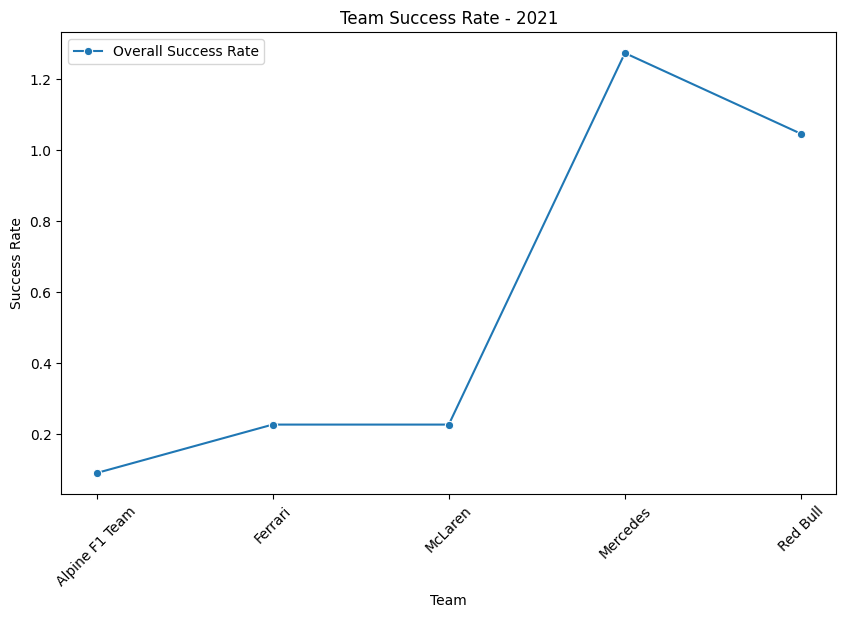

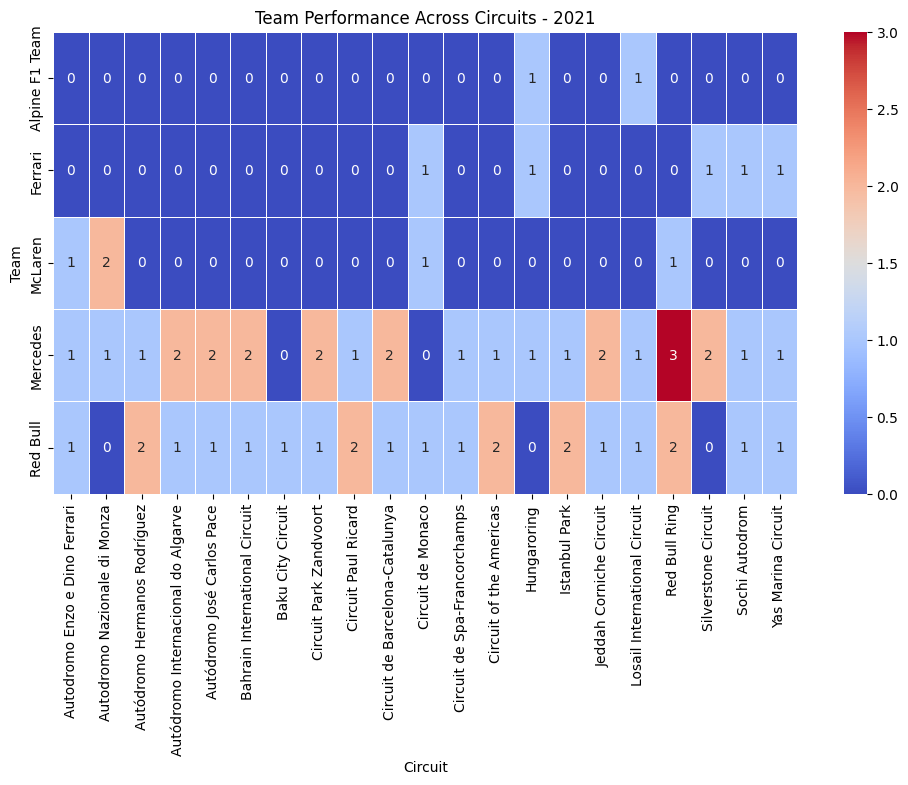



Most successful team in 2022: Red Bull with 28 podiums




<ipython-input-15-1830eb6b3929>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_podiums, x='name', y='Podium Finishes', palette='viridis')


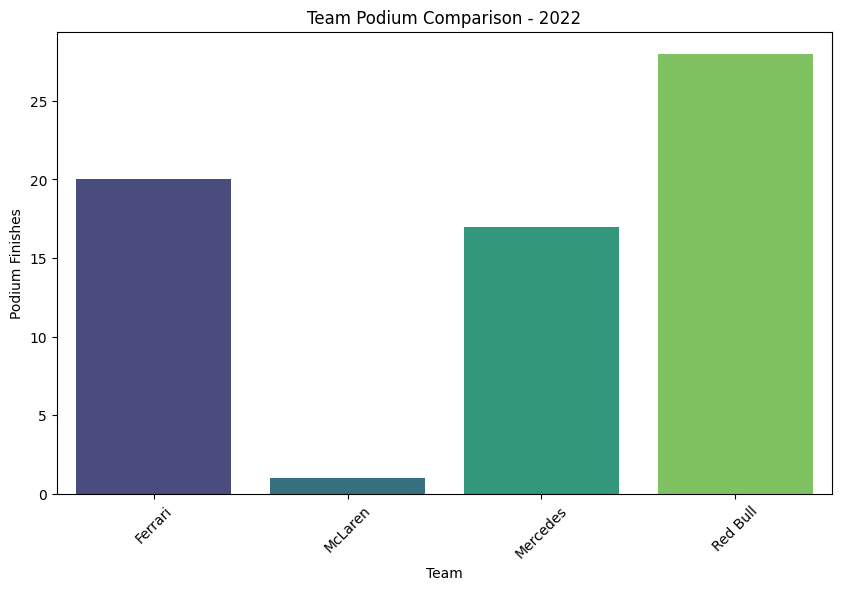

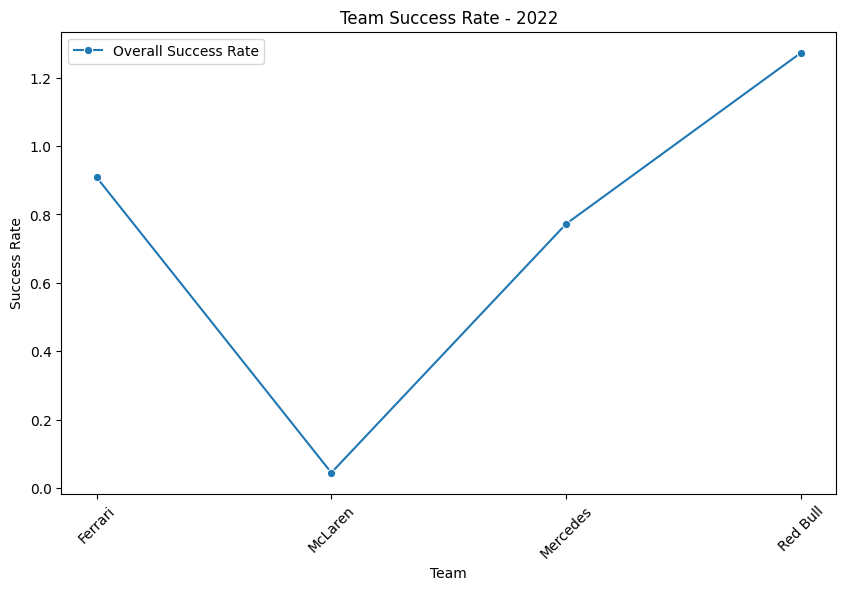

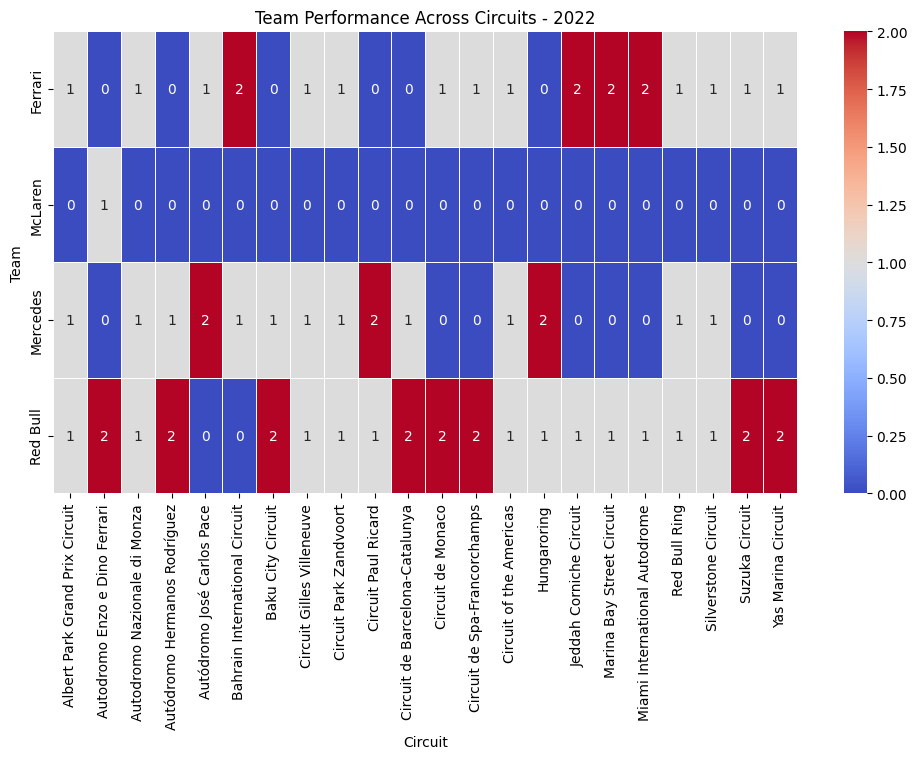



Most successful team in 2023: Red Bull with 30 podiums




<ipython-input-15-1830eb6b3929>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_podiums, x='name', y='Podium Finishes', palette='viridis')


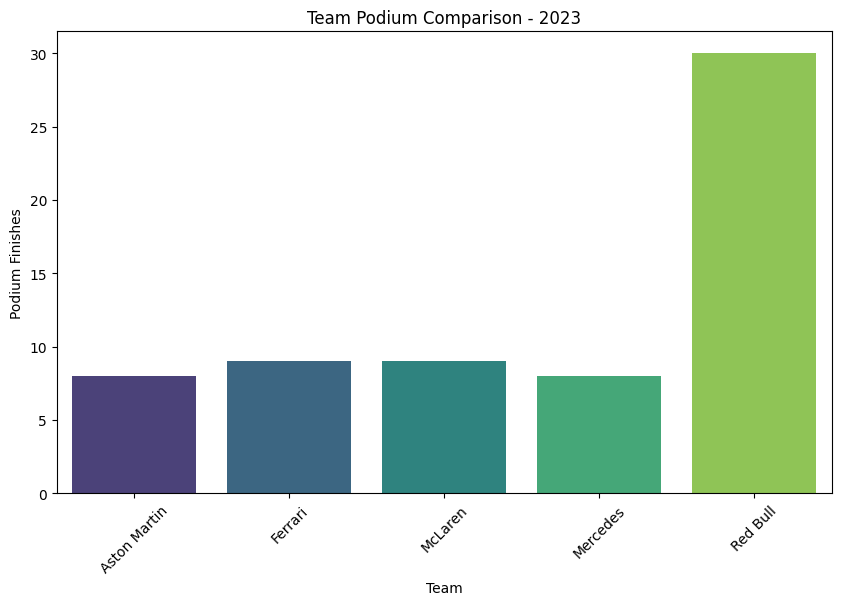

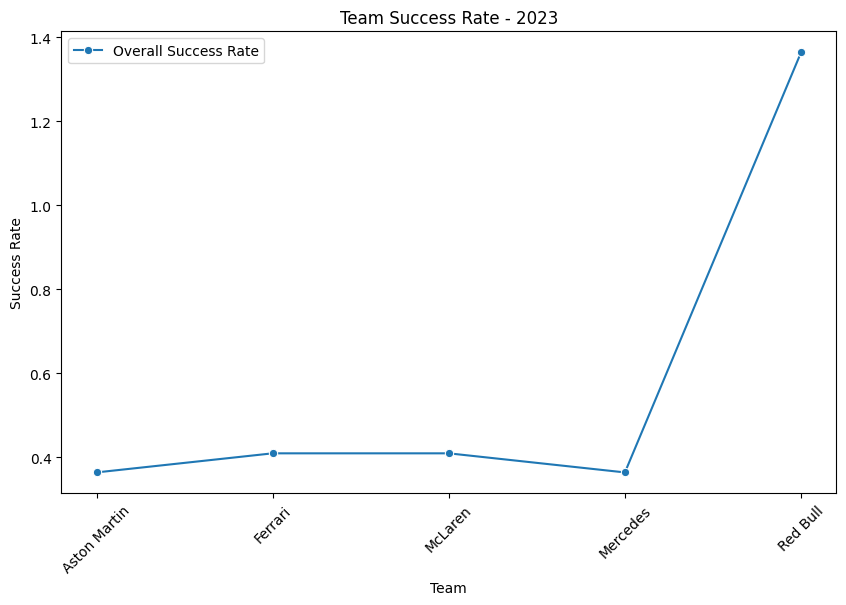

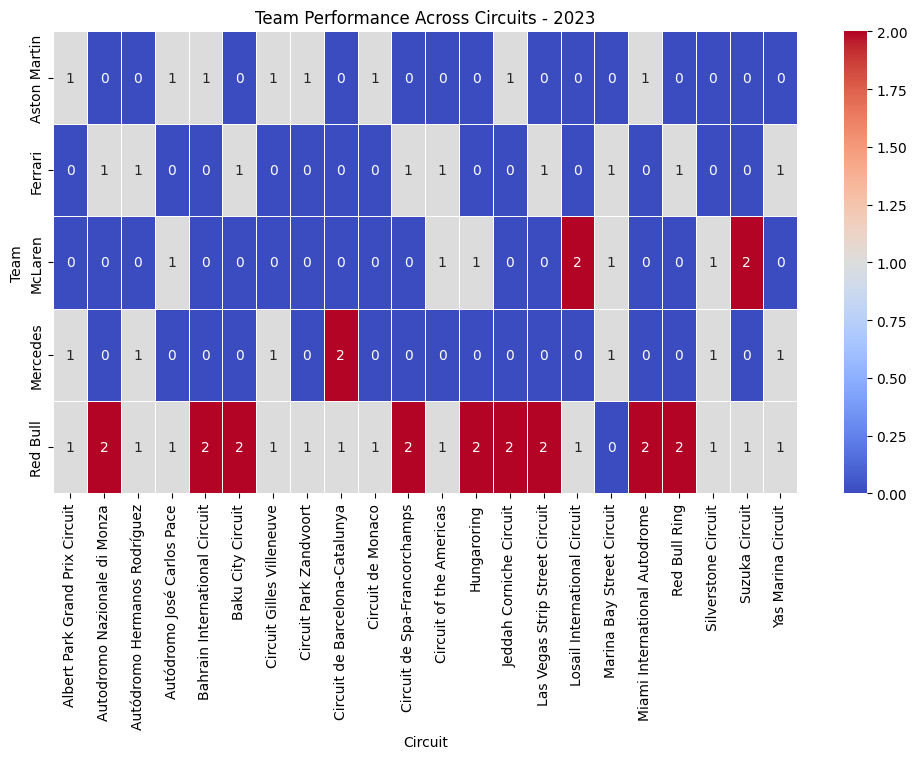



Most successful team in 2024: Ferrari with 22 podiums




<ipython-input-15-1830eb6b3929>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_podiums, x='name', y='Podium Finishes', palette='viridis')


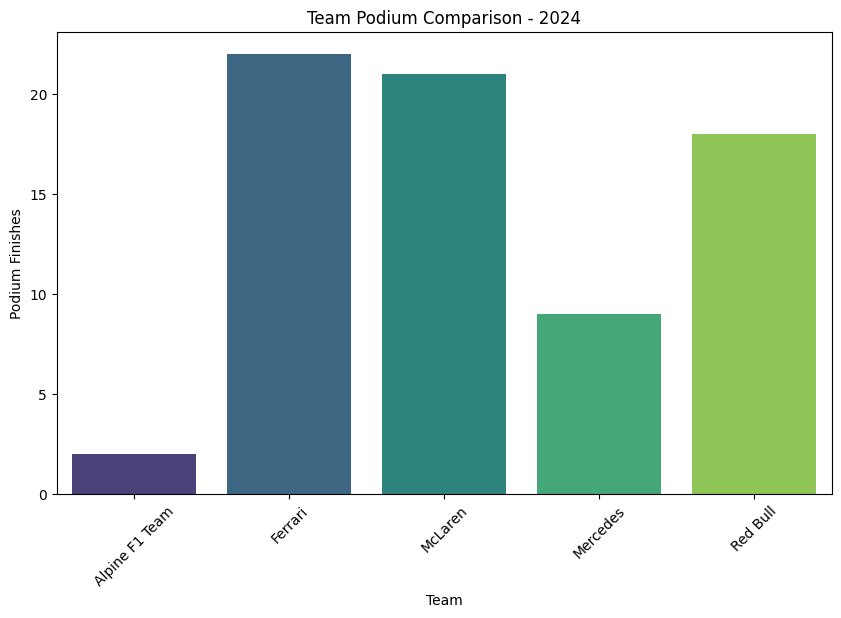

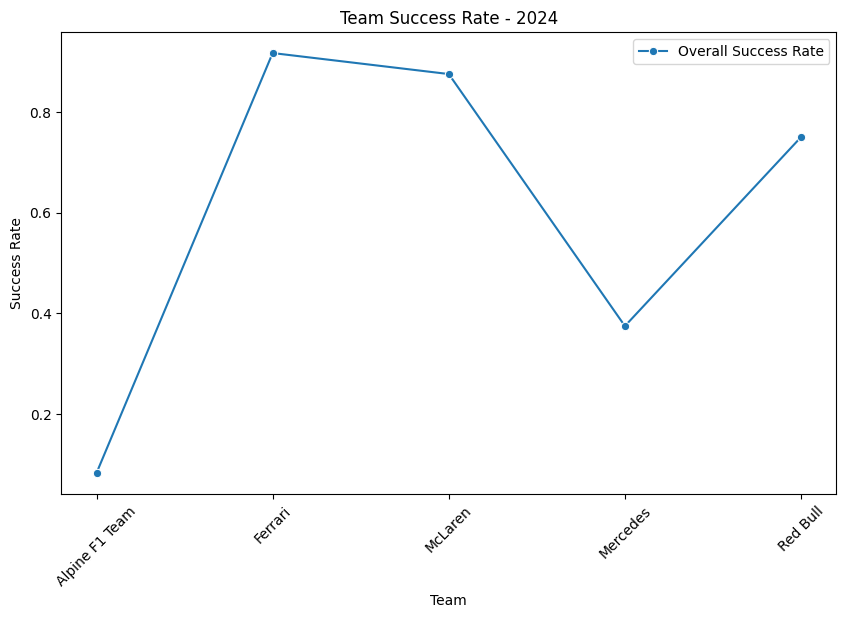

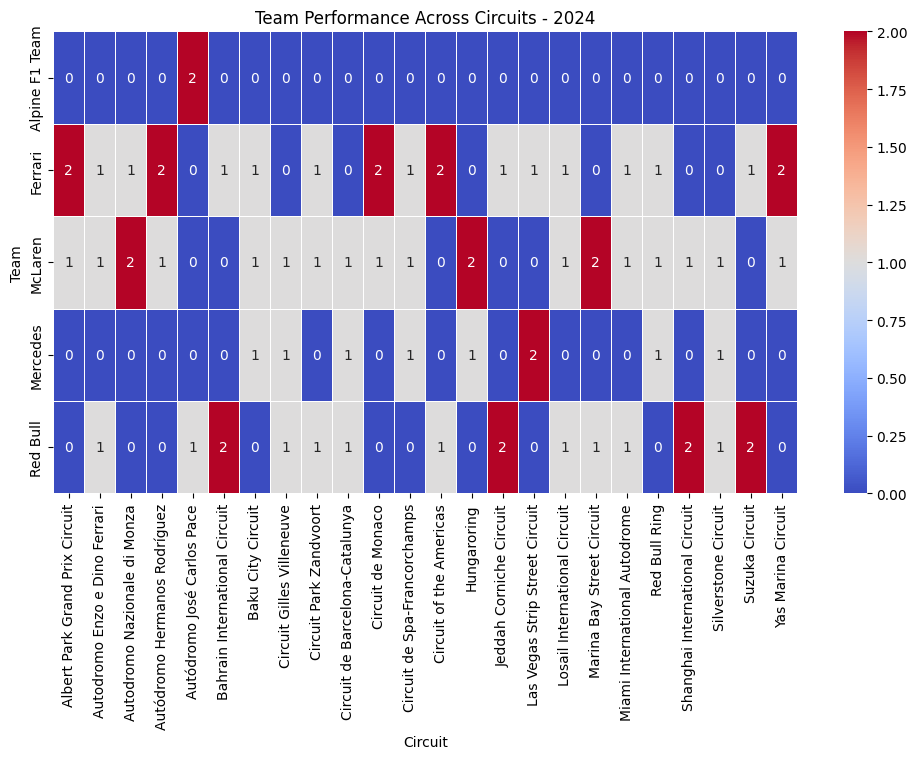

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning
pd.options.mode.use_inf_as_na = True

def team_performance_comparison(season, teams):
    # Load Data
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
    circuits = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/circuits.csv")

    # Merge necessary data
    results = results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')
    results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
    results = results.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('', '_circuit'))

    # Filter for the given season
    season_results = results[results['year'] == season]

    # Keep only podium finishes (positions 1, 2, 3)
    podium_results = season_results[season_results['positionOrder'].isin([1, 2, 3])]

    # Filter for selected teams
    podium_results = podium_results[podium_results['name'].isin(teams)]

    # Overall Podium Count per Team
    team_podiums = podium_results.groupby('name').size().reset_index(name='Podium Finishes')

    # Determine the most successful team
    most_successful_team = team_podiums.loc[team_podiums['Podium Finishes'].idxmax()]
    print(f"\n\nMost successful team in {season}: {most_successful_team['name']} with {most_successful_team['Podium Finishes']} podiums\n\n")

    # Circuit-Wise Podium Count per Team
    circuit_podiums = podium_results.groupby(['name', 'name_circuit']).size().reset_index(name='Podium Count')

    # Success Rate (Podiums / Total Races in the Season)
    total_races = season_results['raceId'].nunique()
    team_podiums['Success Rate'] = team_podiums['Podium Finishes'] / total_races

    # Visualization: Overall Podium Finishes
    plt.figure(figsize=(10, 6))
    sns.barplot(data=team_podiums, x='name', y='Podium Finishes', palette='viridis')
    plt.title(f'Team Podium Comparison - {season}')
    plt.xlabel('Team')
    plt.ylabel('Podium Finishes')
    plt.xticks(rotation=45)
    plt.savefig(f'/content/drive/MyDrive/Sem-8/Data Mining/Package/VISUALS/Team_Podium_Comparison_{season}.png')
    plt.show()

    # Visualization: Success Rate with and without Circuit Factor
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=team_podiums, x='name', y='Success Rate', marker='o', label='Overall Success Rate')
    plt.title(f'Team Success Rate - {season}')
    plt.xlabel('Team')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f'/content/drive/MyDrive/Sem-8/Data Mining/Package/VISUALS/Team_Success_Rate_{season}.png')
    plt.show()

    # Circuit Heatmap (How teams performed on different circuits)
    pivot = circuit_podiums.pivot(index='name', columns='name_circuit', values='Podium Count').fillna(0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Team Performance Across Circuits - {season}')
    plt.xlabel('Circuit')
    plt.ylabel('Team')
    plt.xticks(rotation=90)
    plt.savefig(f'/content/drive/MyDrive/Sem-8/Data Mining/Package/VISUALS/Team_Performance_Circuits_{season}.png')
    plt.show()

    return team_podiums, circuit_podiums

# Loop for seasons 2021-2024 for top 5 teams
for season in range(2021, 2025):
    # Load data to find top 5 teams for each season
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")

    # Merge necessary data
    results = results.merge(races[['raceId', 'year']], on='raceId', how='left')
    results = results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

    # Filter for the given season
    season_results = results[results['year'] == season]

    # Keep only podium finishes (positions 1, 2, 3)
    podium_results = season_results[season_results['positionOrder'].isin([1, 2, 3])]

    # Get the top 5 teams
    top_teams = podium_results['name'].value_counts().nlargest(5).index.tolist()

    # Run analysis for top 5 teams
    team_performance_comparison(season, top_teams)


## 8 Driver Consistency in Race Performance

In [ ]:
import pandas as pd

def analyze_driver_consistency():
    # Load Data
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")

    # Filter for podium finishes (positions 1, 2, 3)
    podium_results = results[results['positionOrder'].isin([1, 2, 3])]

    # Count total races and podium finishes per driver
    total_races = results.groupby('driverId').size().reset_index(name='Total Races')
    podium_finishes = podium_results.groupby('driverId').size().reset_index(name='Total Podiums')

    # Merge with driver names
    driver_stats = total_races.merge(podium_finishes, on='driverId', how='left').fillna(0)
    driver_stats = driver_stats.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

    # Filter out drivers with fewer than 50 races
    driver_stats = driver_stats[driver_stats['Total Races'] >= 50]

    # Calculate Finisher Ratio
    driver_stats['Finisher Ratio'] = driver_stats['Total Podiums'] / driver_stats['Total Races']

    # Determine Consistency
    driver_stats['Consistency'] = driver_stats['Finisher Ratio'].apply(lambda x: 'Consistent' if x >= 0.25 else 'Fluctuating')

    # Save to CSV
    driver_stats = driver_stats[['driverId', 'surname', 'Total Races', 'Total Podiums', 'Finisher Ratio', 'Consistency']]
    driver_stats.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/driver_consistency.csv", index=False)

    print("Driver consistency analysis saved as 'driver_consistency.csv'.")

    # Print Top 10 Most Consistent Finishers
    top_consistent = driver_stats.sort_values(by='Finisher Ratio', ascending=False).head(10)
    print("\nTop 10 Most Consistent Finishers:")
    print(top_consistent[['surname', 'Total Races', 'Total Podiums', 'Finisher Ratio', 'Consistency']])

# Run the function
analyze_driver_consistency()


Driver consistency analysis saved as 'driver_consistency.csv'.

Top 10 Most Consistent Finishers:
        surname  Total Races  Total Podiums  Finisher Ratio Consistency
578      Fangio           58           35.0        0.603448  Consistent
0      Hamilton          356          202.0        0.567416  Consistent
828  Verstappen          209          112.0        0.535885  Consistent
116       Prost          202          106.0        0.524752  Consistent
29   Schumacher          308          155.0        0.503247  Consistent
101       Senna          162           80.0        0.493827  Consistent
372       Clark           73           32.0        0.438356  Consistent
327     Stewart          100           43.0        0.430000  Consistent
19       Vettel          300          122.0        0.406667  Consistent
70         Hill          122           42.0        0.344262  Consistent


##9 Lap Time Efficiency


🏆 Top 5 Circuits where Red Bull performs best based on lap time efficiency:
31. Red Bull Ring - 72451.00 ms
22. Indianapolis Motor Speedway - 77491.76 ms
16. Circuit de Nevers Magny-Cours - 79855.89 ms
20. Hockenheimring - 83113.02 ms
6. Autódromo Internacional do Algarve - 84700.04 ms


<ipython-input-17-83ee87998404>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_efficiency, x='Circuit', y='Avg Lap Time (ms)', palette='coolwarm')


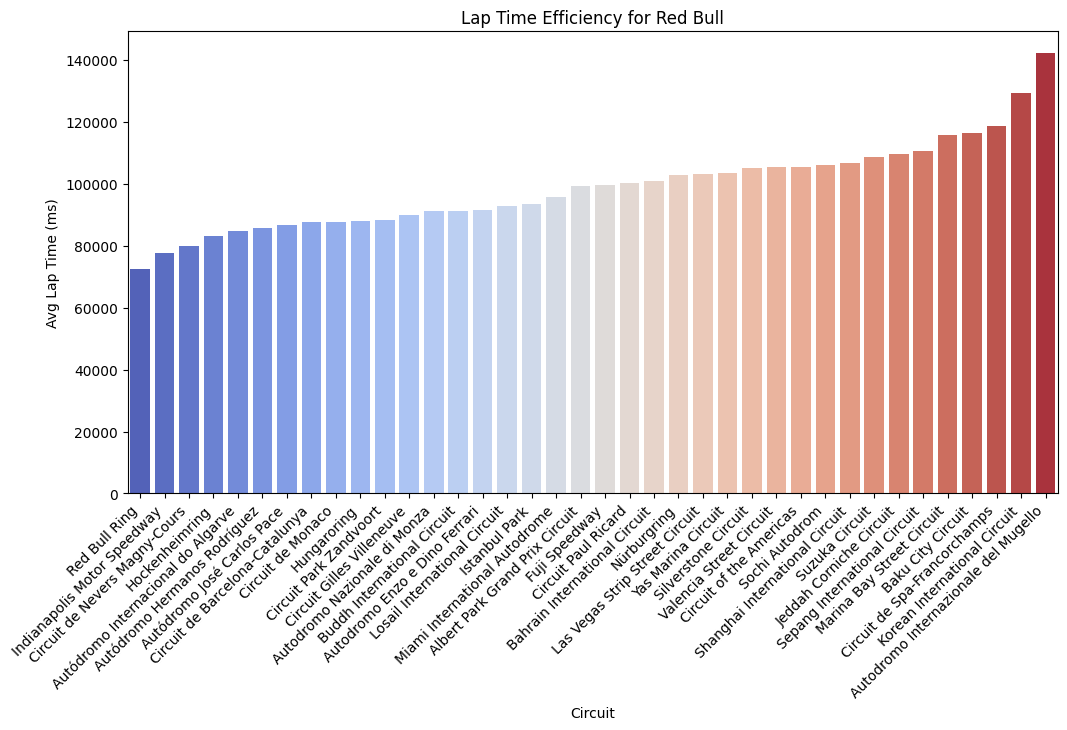

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_team_lap_efficiency(team_name):
    # Load Data
    lap_times = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/lap_times.csv")
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
    circuits = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/circuits.csv")

    # Merge lap times with results to get constructorId
    lap_results = lap_times.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')

    # Merge with races to get circuit info
    lap_results = lap_results.merge(races[['raceId', 'circuitId', 'year']], on='raceId', how='left')

    # Merge with constructors to get team names
    lap_results = lap_results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

    # Merge with circuits to get circuit names
    lap_results = lap_results.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('', '_circuit'))

    # Convert lap times to numeric
    lap_results['milliseconds'] = pd.to_numeric(lap_results['milliseconds'], errors='coerce')

    # Filter for the selected team
    team_lap_data = lap_results[lap_results['name'] == team_name]

    # Calculate Average Lap Time per Circuit for the given team
    team_efficiency = team_lap_data.groupby('name_circuit')['milliseconds'].mean().reset_index()
    team_efficiency.rename(columns={'name_circuit': 'Circuit', 'milliseconds': 'Avg Lap Time (ms)'}, inplace=True)

    # Sort by best circuits (lower lap time is better)
    team_efficiency = team_efficiency.sort_values(by='Avg Lap Time (ms)', ascending=True)

    # Save the efficiency data for the team
    team_efficiency.to_csv(f"/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/{team_name}_lap_efficiency.csv", index=False)

    # Print the top 5 circuits where the team performs best
    print(f"\n🏆 Top 5 Circuits where {team_name} performs best based on lap time efficiency:")
    for i, row in team_efficiency.head(5).iterrows():
        print(f"{i+1}. {row['Circuit']} - {row['Avg Lap Time (ms)']:.2f} ms")

    # Visualization: Average Lap Time per Circuit for the Team
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_efficiency, x='Circuit', y='Avg Lap Time (ms)', palette='coolwarm')
    plt.title(f'Lap Time Efficiency for {team_name}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Circuit')
    plt.ylabel('Avg Lap Time (ms)')
    plt.savefig(f"/content/drive/MyDrive/Sem-8/Data Mining/Package/VISUALS/{team_name}_Lap_Time_Efficiency.png", bbox_inches='tight')
    plt.show()

# Example Usage
team_name = "Red Bull"  # Change to any team you want
analyze_team_lap_efficiency(team_name)


## 10  Best Team Lineup

In [ ]:
import pandas as pd

def build_best_team_lineup():
    # Load Data
    driver_performance = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/driver_performance.csv")
    constructor_performance = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/constructor_performance.csv")
    driver_consistency = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/driver_consistency.csv")
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")
    drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")

    # Merge results to get constructorId for each driver
    driver_constructor = results[['driverId', 'constructorId']].drop_duplicates()

    # Merge with constructor names
    driver_constructor = driver_constructor.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
    driver_constructor.rename(columns={'name': 'constructorName'}, inplace=True)

    # Merge driver performance with consistency data using driverId
    driver_data = driver_performance.merge(driver_consistency, on='driverId', how='left')

    # Merge with driver names
    driver_data = driver_data.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

    # Rename the correct surname column to driverName
    driver_data.rename(columns={'surname': 'driverName'}, inplace=True)

    # Merge with constructor data
    driver_data = driver_data.merge(driver_constructor, on='driverId', how='left')

    # Rank drivers based on performance trends
    driver_data['Performance Score'] = (
        driver_data['total_points'] * 0.5 +  # Weighted higher
        driver_data['total_podiums'] * 0.3 +
        driver_data['win_ratio'] * 100 * 0.2  # Convert ratio to percentage
    )

    # Sort drivers by performance score in descending order
    driver_data = driver_data.sort_values(by='Performance Score', ascending=False)

    # Select top 2 drivers for each team
    best_lineup = driver_data.groupby('constructorId').head(2)

    # Merge with constructor performance for additional insights
    best_lineup = best_lineup.merge(constructor_performance, on='constructorId', how='left')

    print(best_lineup.columns)

        ## Merge with drivers to get driverName
    best_lineup = best_lineup.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
    best_lineup.rename(columns={'surname': 'driverName'}, inplace=True)

    # Merge with constructors to get constructorName
    best_lineup = best_lineup.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
    best_lineup.rename(columns={'name': 'constructorName2'}, inplace=True)

    # Save the updated best lineup
    best_lineup[['constructorName', 'driverName', 'Performance Score']].to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/best_team_lineup.csv", index=False)

    print("\n🏆 Top 10 Best Possible Team Lineups:")
    print(best_lineup[['constructorName', 'driverName', 'Performance Score']].head(10))


# Run the function
build_best_team_lineup()


Index(['driverId', 'total_races_x', 'total_wins_x', 'total_podiums_x',
       'total_points_x', 'win_ratio_x', 'podium_ratio_x', 'first_race',
       'last_race', 'career_length', 'surname_x', 'Total Races',
       'Total Podiums', 'Finisher Ratio', 'Consistency', 'surname_y',
       'constructorId', 'constructorName', 'Performance Score',
       'total_races_y', 'total_wins_y', 'total_podiums_y', 'total_points_y',
       'win_ratio_y', 'podium_ratio_y'],
      dtype='object')

🏆 Top 10 Best Possible Team Lineups:
  constructorName  driverName  Performance Score
0         McLaren    Hamilton        2476.748876
1        Mercedes    Hamilton        2476.748876
2    Aston Martin      Vettel        1589.133333
3        Red Bull      Vettel        1589.133333
4      Toro Rosso      Vettel        1589.133333
5         Ferrari      Vettel        1589.133333
6      BMW Sauber      Vettel        1589.133333
7        Red Bull  Verstappen        1495.878708
8      Toro Rosso  Verstappen        14

## 11 Predictions for 2025 Season

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load Data
drivers_df = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')
constructors_df = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv')
results_df = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')
qualifying_df = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/qualifying.csv')
races_df = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')

# Step 2: Filter races for 2020-2024
races_df = races_df[races_df['year'].between(2020, 2024)]

# Step 3: Merge race year with results
results_merged = pd.merge(results_df, races_df[['raceId', 'year']], on='raceId', how='left')

# Step 4: Merge with drivers & constructors
results_merged = pd.merge(results_merged, drivers_df[['driverId', 'surname']], on='driverId', how='left')
results_merged = pd.merge(results_merged, constructors_df[['constructorId', 'name']], on='constructorId', how='left')

# Step 5: Calculate driver & constructor stats
driver_stats = results_merged.groupby('driverId').agg({
    'points': 'sum',
    'positionOrder': lambda x: (x == 1).sum()  # Wins count
}).reset_index().rename(columns={'points': 'points_driver_stats', 'positionOrder': 'wins_driver_stats'})

constructor_stats = results_merged.groupby('constructorId').agg({
    'points': 'sum',
    'positionOrder': lambda x: (x == 1).sum()  # Wins count
}).reset_index().rename(columns={'points': 'points_constructor_stats', 'positionOrder': 'wins_constructor_stats'})

# Merge stats
results_merged = pd.merge(results_merged, driver_stats, on='driverId', how='left')
results_merged = pd.merge(results_merged, constructor_stats, on='constructorId', how='left')

# Step 6: Average qualifying position per driver
qualifying_avg = qualifying_df.groupby('driverId')['position'].mean().reset_index()
qualifying_avg.rename(columns={'position': 'avg_qualifying_pos'}, inplace=True)

# Merge qualifying data
results_merged = pd.merge(results_merged, qualifying_avg, on='driverId', how='left')

# Step 7: Create label columns (Champion: 1 for winner, 0 otherwise)
results_merged['driver_champion'] = np.where(results_merged['positionOrder'] == 1, 1, 0)
results_merged['constructor_champion'] = np.where(results_merged['positionOrder'] == 1, 1, 0)

# Step 8: Define features
features = ['points_driver_stats', 'wins_driver_stats', 'avg_qualifying_pos', 'points_constructor_stats', 'wins_constructor_stats']

# Ensure all features exist and fill NaN values
for feature in features:
    if feature not in results_merged.columns:
        results_merged[feature] = 0  # Fill missing features with 0
results_merged.fillna(0, inplace=True)  # Fill any remaining NaN values

# Step 9: Prepare Driver Championship Prediction
X = results_merged[features]
y_driver = results_merged['driver_champion']

# Split data
X_train_driver, X_test_driver, y_train_driver, y_test_driver = train_test_split(X, y_driver, test_size=0.2, random_state=42)

# Train Model
rf_driver = RandomForestClassifier(n_estimators=100, random_state=42)
rf_driver.fit(X_train_driver, y_train_driver)

# Predict & Evaluate
y_pred_driver = rf_driver.predict(X_test_driver)
print(f"Driver Championship Accuracy: {accuracy_score(y_test_driver, y_pred_driver):.2f}")

# Step 10: Prepare Constructor Championship Prediction
y_constructor = results_merged['constructor_champion']
X_train_constructor, X_test_constructor, y_train_constructor, y_test_constructor = train_test_split(X, y_constructor, test_size=0.2, random_state=42)

# Train Model
rf_constructor = RandomForestClassifier(n_estimators=100, random_state=42)
rf_constructor.fit(X_train_constructor, y_train_constructor)

# Predict & Evaluate
y_pred_constructor = rf_constructor.predict(X_test_constructor)
print(f"Constructor Championship Accuracy: {accuracy_score(y_test_constructor, y_pred_constructor):.2f}")

# Step 11: Predict 2025 Champions
races_2024 = races_df[races_df['year'] == 2024]  # Get last known stats
latest_driver_stats = driver_stats.copy()
latest_constructor_stats = constructor_stats.copy()

# Assign 2025 as the new season
latest_driver_stats['year'] = 2025
latest_constructor_stats['year'] = 2025

# Merge with 2024 qualifying data
latest_driver_stats = pd.merge(latest_driver_stats, qualifying_avg, on='driverId', how='left')

# Prepare Data for 2025 Prediction
X_2025 = latest_driver_stats[['points_driver_stats', 'wins_driver_stats', 'avg_qualifying_pos']].copy()
X_2025['points_constructor_stats'] = latest_constructor_stats['points_constructor_stats']
X_2025['wins_constructor_stats'] = latest_constructor_stats['wins_constructor_stats']

# Fill missing values
X_2025.fillna(0, inplace=True)

# Predict 2025 Champions
predictions_driver_2025 = rf_driver.predict(X_2025)
predictions_constructor_2025 = rf_constructor.predict(X_2025)

# Get Predicted Champion Driver & Constructor
predicted_driver_champion_id = latest_driver_stats.iloc[np.argmax(predictions_driver_2025)]['driverId']
predicted_constructor_champion_id = latest_constructor_stats.iloc[np.argmax(predictions_constructor_2025)]['constructorId']

predicted_driver_name = drivers_df[drivers_df['driverId'] == predicted_driver_champion_id]['surname'].values[0]
predicted_constructor_name = constructors_df[constructors_df['constructorId'] == predicted_constructor_champion_id]['name'].values[0]

# Print Predicted Champions for 2025
print(f"\n🏆 Predicted 2025 Driver Champion: {predicted_driver_name} ({predicted_driver_champion_id})")
print(f"🏆 Predicted 2025 Constructor Champion: {predicted_constructor_name} ({predicted_constructor_champion_id})")


Driver Championship Accuracy: 0.96
Constructor Championship Accuracy: 0.96

🏆 Predicted 2025 Driver Champion: Hamilton (1.0)
🏆 Predicted 2025 Constructor Champion: McLaren (1.0)


##12 Struggling Teams Analysis

In [ ]:
import pandas as pd
import numpy as np

# Load necessary data files
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')
constructors = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv')

# Create an empty list to store underperforming teams data
underperforming_data = []

# Loop over years 2020 to 2024 to gather underperforming teams data
for year in range(2020, 2025):
    # Filter races for the specific year
    races_year = races[races['year'] == year]

    # Merge results with constructor data
    data_year = pd.merge(results, constructors, on='constructorId')

    # Filter results based on the races for the current year
    data_year = pd.merge(data_year, races_year[['raceId']], on='raceId')

    # Clean up the 'position' column, replacing non-numeric values (e.g., '\N\N') with NaN
    data_year['position'] = pd.to_numeric(data_year['position'], errors='coerce')

    # Calculate the average position for each constructor
    constructor_avg_position = data_year.groupby('constructorRef')['position'].mean().reset_index()

    # Calculate the total points earned by each constructor
    constructor_total_points = data_year.groupby('constructorRef')['points'].sum().reset_index()

    # Merge average position and total points for each constructor
    constructor_performance = pd.merge(constructor_avg_position, constructor_total_points, on='constructorRef')

    # Set a threshold for underperformance: if the average position > 10th
    threshold_position = 10
    constructor_performance['underperforming'] = constructor_performance['position'] > threshold_position

    # Add the year column and append to the list
    constructor_performance['year'] = year

    # Store data for each year
    underperforming_data.append(constructor_performance[['year', 'constructorRef', 'underperforming']])

# Combine all the data into a single DataFrame
underperforming_df = pd.concat(underperforming_data, ignore_index=True)

# Display the DataFrame with underperforming teams
#print(underperforming_df)
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming underperforming_df is already created from the previous steps
# underperforming_df = pd.concat(underperforming_data, ignore_index=True)

# Ensure 'year' is treated as an integer
underperforming_df['year'] = underperforming_df['year'].astype(int)

# Encode the categorical 'constructorRef' (team name) using LabelEncoder
le = LabelEncoder()
underperforming_df['constructorRef_encoded'] = le.fit_transform(underperforming_df['constructorRef'])

# Convert 'underperforming' to numeric: True -> 1, False -> 0
underperforming_df['underperforming'] = underperforming_df['underperforming'].astype(int)

# Prepare features (year and constructorRef_encoded) and target (underperforming)
X = underperforming_df[['year', 'constructorRef_encoded']]  # Features
y = underperforming_df['underperforming']  # Target variable

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Prepare data for prediction in 2025
# Get the list of constructors for 2025 (assuming it's the same as 2024)
constructors_2025 = underperforming_df[underperforming_df['year'] == 2024]['constructorRef'].unique()

# Create a DataFrame for the 2025 predictions with the same constructor teams
test_data_2025 = pd.DataFrame({
    'year': [2025] * len(constructors_2025),
    'constructorRef': constructors_2025
})

# Ensure 'year' is integer in the test data as well
test_data_2025['year'] = test_data_2025['year'].astype(int)

# Concatenate 'constructorRef' from both 2024 and 2025 to train a LabelEncoder on all teams
full_constructor_ref = pd.concat([underperforming_df['constructorRef'], test_data_2025['constructorRef']])

# Fit the LabelEncoder on the combined list of constructorRef (for 2024 and 2025)
le_full = LabelEncoder()
le_full.fit(full_constructor_ref)

# Encode the 'constructorRef' for 2025 using the full LabelEncoder
test_data_2025['constructorRef_encoded'] = le_full.transform(test_data_2025['constructorRef'])

# Predict the underperformance for 2025 teams
test_data_2025['underperforming_pred'] = model.predict(test_data_2025[['year', 'constructorRef_encoded']])

# Map predictions back to readable labels
test_data_2025['underperforming_pred'] = test_data_2025['underperforming_pred'].map({0: 'Not Underperforming', 1: 'Underperforming'})


print("Sample Prediction for 2025 on Teams that are underperforming consistently : ")
# Display the predictions for 2025
print(test_data_2025)


Sample Prediction for 2025 on Teams that are underperforming consistently : 
   year constructorRef  constructorRef_encoded underperforming_pred
0  2025         alpine                       2      Underperforming
1  2025   aston_martin                       3      Underperforming
2  2025        ferrari                       4  Not Underperforming
3  2025           haas                       5      Underperforming
4  2025        mclaren                       6  Not Underperforming
5  2025       mercedes                       7  Not Underperforming
6  2025             rb                       9      Underperforming
7  2025       red_bull                      10  Not Underperforming
8  2025         sauber                      12      Underperforming
9  2025       williams                      13      Underperforming


## 13 Driver-Specific Track Struggles

In [ ]:
import pandas as pd
# Load the data files
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')          # race information (raceId, circuitId, year, etc.)
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')      # race results (raceId, driverId, position, etc.)
drivers = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')      # driver information (driverId, driverName, etc.)
circuits = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/circuits.csv')    # circuit information (circuitId, name, location)
# Merge results with races and circuits to get the circuit name and the driver name
data = pd.merge(results, races[['raceId', 'circuitId']], on='raceId')
data = pd.merge(data, circuits[['circuitId', 'name']], on='circuitId')
data = pd.merge(data, drivers[['driverId', 'surname']], on='driverId')
# Calculate the average position of each driver on each circuit
data['position'] = pd.to_numeric(data['position'], errors='coerce')
# Drop rows with NaN values in the 'position' column
data = data.dropna(subset=['position'])
# Calculate the mean position for each driver on each circuit
driver_performance = data.groupby(['surname', 'name'])['position'].mean().reset_index()
# Define thresholds for struggling (average position > 10) and excelling (average position <= 5)
struggling_threshold = 10
excelling_threshold = 5
# For each driver, find the most excelling and struggling circuits
final_results = []
for driver in driver_performance['surname'].unique():
    driver_data = driver_performance[driver_performance['surname'] == driver]
    if not driver_data.empty:
        # Find the most excelling circuit (lowest average position)
        most_excelling_circuit = driver_data.loc[driver_data['position'].idxmin()]

        # Find the most struggling circuit (highest average position)
        most_struggling_circuit = driver_data.loc[driver_data['position'].idxmax()]

        # Store the results (even if they are the same, we will store them)
        final_results.append({
            'driver_name': driver,
            'most_struggling_circuit': most_struggling_circuit['name'],
            'most_excelling_circuit': most_excelling_circuit['name']
        })
# Create a DataFrame from the results
final_results_df = pd.DataFrame(final_results)
# Save the results to a CSV file
final_results_df.to_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/Driver_Circuit_Performance.csv', index=False)
# Display the results for drivers where the most struggling and most excelling circuits are distinct
print("Drivers with distinct excelling and struggling circuits:")
# Filter rows where "most struggling" and "most excelling" circuits are different
filtered_results = final_results_df[final_results_df['most_struggling_circuit'] != final_results_df['most_excelling_circuit']]
for index, row in filtered_results.head(5).iterrows():
    print("\n")
    print(f"Driver: {row['driver_name']}")
    print(f"Most Struggling Circuit: {row['most_struggling_circuit']}")
    print(f"Most Excelling Circuit: {row['most_excelling_circuit']}")
    print("-" * 40)  # Separator for clarity



Drivers with distinct excelling and struggling circuits:


Driver: Albers
Most Struggling Circuit: Autodromo Nazionale di Monza
Most Excelling Circuit: Hungaroring
----------------------------------------


Driver: Albon
Most Struggling Circuit: Autódromo José Carlos Pace
Most Excelling Circuit: Autodromo Internazionale del Mugello
----------------------------------------


Driver: Alboreto
Most Struggling Circuit: Circuito de Jerez
Most Excelling Circuit: Nürburgring
----------------------------------------


Driver: Alesi
Most Struggling Circuit: Red Bull Ring
Most Excelling Circuit: Circuit Gilles Villeneuve
----------------------------------------


Driver: Alguersuari
Most Struggling Circuit: Marina Bay Street Circuit
Most Excelling Circuit: Buddh International Circuit
----------------------------------------


#14 Championship Retention Probability

In [ ]:
import pandas as pd

# Load necessary data files
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')
constructors = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv')
drivers = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')

# Extract year-wise championship winners for drivers and constructors
def get_champions(year):
    # Filter results for the given year
    races_year = races[races['year'] == year]

    # Merge results with races data
    data_year = pd.merge(results, races_year[['raceId']], on='raceId')

    # Group by driver and constructor and calculate the total points
    driver_points = data_year.groupby('driverId')['points'].sum().reset_index()
    constructor_points = data_year.groupby('constructorId')['points'].sum().reset_index()

    # Identify the driver and constructor with maximum points
    driver_champion_id = driver_points.loc[driver_points['points'].idxmax()]['driverId']
    constructor_champion_id = constructor_points.loc[constructor_points['points'].idxmax()]['constructorId']

    # Get driver and constructor names using their IDs
    driver_champion_name = drivers[drivers['driverId'] == driver_champion_id]['surname'].values[0]
    constructor_champion_name = constructors[constructors['constructorId'] == constructor_champion_id]['name'].values[0]

    return driver_champion_name, constructor_champion_name

# List to store champions for each year
drivers_champions = []
constructors_champions = []

# Loop through the years (e.g., 2020 to 2024)
for year in range(2020, 2025):
    driver_champion, constructor_champion = get_champions(year)
    drivers_champions.append((year, driver_champion))
    constructors_champions.append((year, constructor_champion))

# Convert to DataFrames for easy analysis
drivers_champions_df = pd.DataFrame(drivers_champions, columns=['year', 'driverName'])
constructors_champions_df = pd.DataFrame(constructors_champions, columns=['year', 'constructorName'])

# Verify column names
print("Drivers Champions DataFrame columns:", drivers_champions_df.columns)
print("Constructors Champions DataFrame columns:", constructors_champions_df.columns)

# Check for back-to-back champions (driver and constructor)
def check_back_to_back(champions_df, column_name):
    back_to_back = 0
    total = len(champions_df) - 1  # Because we need to compare with the next season

    for i in range(total):
        if champions_df.iloc[i][column_name] == champions_df.iloc[i + 1][column_name]:
            back_to_back += 1

    return back_to_back / total if total > 0 else 0

# Calculate probabilities
driver_back_to_back_prob = check_back_to_back(drivers_champions_df, 'driverName')
constructor_back_to_back_prob = check_back_to_back(constructors_champions_df, 'constructorName')

# Get the current champions for the most recent year (2024)
current_driver_champion = drivers_champions_df[drivers_champions_df['year'] == 2024]['driverName'].values[0]
current_constructor_champion = constructors_champions_df[constructors_champions_df['year'] == 2024]['constructorName'].values[0]


print("\n\n")
# Display the results
print(f"Current Driver Champion: {current_driver_champion}")
print(f"Probability of {current_driver_champion} being a back-to-back champion: {driver_back_to_back_prob:.2f}")
print(f"Current Constructor Champion: {current_constructor_champion}")
print(f"Probability of {current_constructor_champion} being a back-to-back champion: {constructor_back_to_back_prob:.2f}")


Drivers Champions DataFrame columns: Index(['year', 'driverName'], dtype='object')
Constructors Champions DataFrame columns: Index(['year', 'constructorName'], dtype='object')



Current Driver Champion: Verstappen
Probability of Verstappen being a back-to-back champion: 0.75
Current Constructor Champion: McLaren
Probability of McLaren being a back-to-back champion: 0.50


## 15 Champion Age Trends

In [ ]:
import pandas as pd
from datetime import datetime

# Load necessary data files
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')
drivers = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')

# Map position to points based on the 1st to 8th positions
position_to_points = {
    1: 10,  # 1st position gets 10 points
    2: 8,   # 2nd position gets 8 points
    3: 6,   # 3rd position gets 6 points
    0: 5,   # 4th position gets 5 points
    0: 4,   # 5th position gets 4 points
    0: 3,   # 6th position gets 3 points
    0: 2,   # 7th position gets 2 points
    0: 1    # 8th position gets 1 point
}

# Create an empty list to store driver performance data
driver_performance_data = []

# Loop over each race in the results dataset
for raceId in results['raceId'].unique():
    # Get the race year
    race_year = races[races['raceId'] == raceId]['year'].values[0]

    # Filter results for the current race
    race_results = results[results['raceId'] == raceId]

    # For each driver in the race, calculate their age at the time of the race
    for _, row in race_results.iterrows():
        driver_id = row['driverId']
        driver_info = drivers[drivers['driverId'] == driver_id].iloc[0]
        driver_birthdate = driver_info['dob']

        # Calculate the driver's age at the time of the race
        birth_date = datetime.strptime(driver_birthdate, '%Y-%m-%d')
        age_at_race = race_year - birth_date.year

        # Get the points for the driver's position, based on the mapping
        points = position_to_points.get(row['positionOrder'], 0)  # Default to 0 if position is outside the range

        # Append the data for this race
        driver_performance_data.append({
            'year': race_year,
            'driverId': driver_id,
            'driverName': driver_info['forename'] + ' ' + driver_info['surname'],
            'age': age_at_race,
            'position': row['positionOrder'],
            'points': points  # Use mapped points based on position
        })

# Convert the data to a DataFrame
driver_performance_df = pd.DataFrame(driver_performance_data)

# Aggregate the points by driver and year
driver_points_per_year = driver_performance_df.groupby(['year', 'driverName']).agg(
    total_points=('points', 'sum')
).reset_index()

# Create age groups
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']
driver_performance_df['age_group'] = pd.cut(driver_performance_df['age'], bins=bins, labels=labels, right=False)

# Aggregate by age group and calculate the total points per age group
age_group_points = driver_performance_df.groupby(['year', 'age_group']).agg(
    total_points=('points', 'sum')
).reset_index()

# Find the top-performing drivers in each year
top_drivers = driver_points_per_year.loc[driver_points_per_year.groupby('year')['total_points'].idxmax()]

# Merge the top drivers with the age group data
champion_age_data = pd.merge(top_drivers, driver_performance_df[['year', 'driverName', 'age_group']], on=['year', 'driverName'])

# Now, analyze the trends across decades (e.g., 1950s, 1960s, etc.)
champion_age_data['decade'] = (champion_age_data['year'] // 10) * 10

# Aggregate the data by decade and age group to see the trends
age_group_decade_trends = champion_age_data.groupby(['decade', 'age_group']).agg(
    total_championships=('driverName', 'count')
).reset_index()

# Display the trends by decade and age group
#print(age_group_decade_trends)
age_group_decade_trends = age_group_decade_trends.dropna(subset=['decade', 'age_group', 'total_championships'])
age_group_decade_trends = age_group_decade_trends.loc[(age_group_decade_trends != 0).all(axis=1)]
# Display the filtered trends, showing the row with the most championship points for each year and age group
age_group_decade_trends.to_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/ChampionsAgeTrends.csv', index=False)
# Find the row with the most championship points for each year and age group
print("Top performing Age groups of each year with their Championship Finishes--(1st/2nd/3rd)")

# Load the CSV file into a DataFrame
age_group_decade_trends = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/ChampionsAgeTrends.csv')
# Drop rows with NaN values in specified columns
age_group_decade_trends = age_group_decade_trends.dropna(subset=['decade', 'age_group', 'total_championships'])
# Filter out rows where 'total_championships' is zero
age_group_decade_trends = age_group_decade_trends[age_group_decade_trends['total_championships'] > 0]

# Group by 'decade' and find the age group with the maximum 'total_championships'
max_age_groups = age_group_decade_trends.loc[
    age_group_decade_trends.groupby('decade')['total_championships'].idxmax()
]

print("Deacde   Age Group   Max-Finishing Points")
# Print the results
for index, row in max_age_groups.iterrows():
    print(f"{row['decade']}       {row['age_group']}      {row['total_championships']}")

print("\n\n")

max_age_groups.to_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/ChampionshipBestAges.csv",index=False)


<ipython-input-23-86329cfb935a>:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_points = driver_performance_df.groupby(['year', 'age_group']).agg(
<ipython-input-23-86329cfb935a>:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_decade_trends = champion_age_data.groupby(['decade', 'age_group']).agg(


Top performing Age groups of each year with their Championship Finishes--(1st/2nd/3rd)
Deacde   Age Group   Max-Finishing Points
1950       40-44      22
1960       30-34      56
1970       25-29      95
1980       30-34      105
1990       30-34      80
2000       25-29      70
2010       30-34      122
2020       25-29      68





## 16 the future team

In [ ]:
'''
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data files
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')  # Replace with your actual file path
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')  # Replace with your actual file path
constructors = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv')  # Replace with your actual file path
drivers = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')  # To get driver names

# Step 1: Merge the results with races to get the year
driver_teams = pd.merge(results, races[['raceId', 'year']], on='raceId')

# Step 2: Merge the results with constructors to get driver-team information
driver_teams = pd.merge(driver_teams, constructors[['constructorId', 'constructorRef']], on='constructorId')

# Extract the columns: driver, year, constructor team
driver_teams = driver_teams[['driverId', 'year', 'constructorRef']]

# Sort the data by driver and year to make sure the transitions are in correct order
driver_teams = driver_teams.sort_values(by=['driverId', 'year'])

# Step 3: Identify switches for each driver
# Shift constructor reference to identify if the team changed between seasons
driver_teams['previous_team'] = driver_teams.groupby('driverId')['constructorRef'].shift(1)

# Mark team switches (where the current and previous team are different)
driver_teams['team_switch'] = driver_teams['constructorRef'] != driver_teams['previous_team']

# Step 4: Filter out drivers with at least one team switch between 2021 and 2024
drivers_switching_2021_2024 = driver_teams[(driver_teams['year'] >= 2021) & (driver_teams['year'] <= 2024)]
drivers_switching_2021_2024 = drivers_switching_2021_2024[drivers_switching_2021_2024['team_switch'] == True]

# Step 5: Count number of switches for each driver
switch_counts = drivers_switching_2021_2024.groupby('driverId').size().reset_index(name='switch_count')

# Filter drivers who switched at least twice (high probability of switching)
high_prob_drivers = switch_counts[switch_counts['switch_count'] >= 2]

# Step 6: Create features for modeling
# Collect past teams for each high-probability driver
high_prob_drivers_data = []
for driver in high_prob_drivers['driverId']:
    past_teams = driver_teams[driver_teams['driverId'] == driver]

    # List of teams the driver has been with
    past_teams_list = past_teams['constructorRef'].tolist()

    high_prob_drivers_data.append({
        'driverId': driver,
        'past_teams': past_teams_list,
        'total_switches': len(past_teams_list),
    })

drivers_features = pd.DataFrame(high_prob_drivers_data)

# Step 7: Encode teams for machine learning model
le = LabelEncoder()
drivers_features['most_recent_team'] = drivers_features['past_teams'].apply(lambda x: x[-1])  # Use most recent team
drivers_features['most_recent_team_encoded'] = le.fit_transform(drivers_features['most_recent_team'])

# Step 8: Prepare the data for training
X = drivers_features[['total_switches']]  # Feature: Total switches
y = drivers_features['most_recent_team_encoded']  # Target: Most recent team

# Step 9: Train a Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predict the team for 2025
# For each driver in high_prob_drivers, predict the future team for 2025
drivers_features['predicted_team'] = model.predict(X)
drivers_features['predicted_team_probabilities'] = model.predict_proba(X).max(axis=1)

# Step 11: Add previous team information
drivers_features['previous_team'] = drivers_features['past_teams'].apply(lambda x: x[-1])  # Most recent team before 2025

# Avoid predicting the same team as the previous team
drivers_features['predicted_team'] = drivers_features.apply(
    lambda row: row['predicted_team'] if row['predicted_team'] != le.transform([row['previous_team']])[0] else None, axis=1
)

# Step 12: Filter out rows where the predicted team is None
drivers_features = drivers_features[drivers_features['predicted_team'].notna()]

# Step 13: Map the predicted team back to its name
drivers_features['predicted_team'] = le.inverse_transform(drivers_features['predicted_team'].astype(int))

# Step 14: Add driver names
drivers_features = pd.merge(drivers_features, drivers[['driverId', 'driverRef']], on='driverId', how='left')

# Step 15: Create a final DataFrame with driverId, previous team, predicted team, prediction probability, and driverName
final_predictions = drivers_features[['driverId', 'driverRef', 'previous_team', 'predicted_team', 'predicted_team_probabilities']]

# Display the predictions for 2025
print("Predicted team transitions for drivers in 2025 with probabilities:")
print(final_predictions)

# Optional: Save to CSV
final_predictions.to_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/RESULTS CSV FILES/PredictedTeamTransitions2025_with_Probabilities.csv', index=False)
'''

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
import numpy as np

# Load your data files (unchanged)
races = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv')
results = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv')
constructors = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv')
drivers = pd.read_csv('/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv')

# (Steps 1-9 unchanged: Data preprocessing and model training)
driver_teams = pd.merge(results, races[['raceId', 'year']], on='raceId')
driver_teams = pd.merge(driver_teams, constructors[['constructorId', 'constructorRef']], on='constructorId')
driver_teams = driver_teams[['driverId', 'year', 'constructorRef']]
driver_teams = driver_teams.sort_values(by=['driverId', 'year'])
driver_teams['previous_team'] = driver_teams.groupby('driverId')['constructorRef'].shift(1)
driver_teams['team_switch'] = driver_teams['constructorRef'] != driver_teams['previous_team']
drivers_switching_2021_2024 = driver_teams[(driver_teams['year'] >= 2021) & (driver_teams['year'] <= 2024)]
drivers_switching_2021_2024 = drivers_switching_2021_2024[drivers_switching_2021_2024['team_switch'] == True]
switch_counts = drivers_switching_2021_2024.groupby('driverId').size().reset_index(name='switch_count')
high_prob_drivers = switch_counts[switch_counts['switch_count'] >= 2]

high_prob_drivers_data = []
for driver in high_prob_drivers['driverId']:
    past_teams = driver_teams[driver_teams['driverId'] == driver]
    past_teams_list = past_teams['constructorRef'].tolist()
    high_prob_drivers_data.append({
        'driverId': driver,
        'past_teams': past_teams_list,
        'total_switches': len(past_teams_list),
    })

drivers_features = pd.DataFrame(high_prob_drivers_data)
le = LabelEncoder()
drivers_features['most_recent_team'] = drivers_features['past_teams'].apply(lambda x: x[-1])
drivers_features['most_recent_team_encoded'] = le.fit_transform(drivers_features['most_recent_team'])

X = drivers_features[['total_switches']]
y = drivers_features['most_recent_team_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# (Steps 10-15 unchanged: Predictions)
drivers_features['predicted_team'] = model.predict(X)
drivers_features['predicted_team_probabilities'] = model.predict_proba(X).max(axis=1)
drivers_features['previous_team'] = drivers_features['past_teams'].apply(lambda x: x[-1])
drivers_features['predicted_team'] = drivers_features.apply(
    lambda row: row['predicted_team'] if row['predicted_team'] != le.transform([row['previous_team']])[0] else None, axis=1
)
drivers_features = drivers_features[drivers_features['predicted_team'].notna()]
drivers_features['predicted_team'] = le.inverse_transform(drivers_features['predicted_team'].astype(int))
drivers_features = pd.merge(drivers_features, drivers[['driverId', 'driverRef']], on='driverId', how='left')
final_predictions = drivers_features[['driverId', 'driverRef', 'previous_team', 'predicted_team', 'predicted_team_probabilities']]

# Step 16: Use LIME to explain predictions
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=['total_switches'],
    class_names=le.classes_,  # Team names as class labels
    mode='classification'
)

# Select a specific driver to explain (e.g., the first driver in final_predictions)
driver_to_explain = final_predictions.iloc[0]
driver_features = X.iloc[0].values.reshape(1, -1)  # Features for this driver
driver_pred = model.predict(driver_features)[0]

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=driver_features[0],
    predict_fn=model.predict_proba,
    num_features=1  # Since we only have one feature
)

# Display the explanation
print(f"\nExplaining prediction for driver: {driver_to_explain['driverRef']}")
print(f"Previous team: {driver_to_explain['previous_team']}")
print(f"Predicted team for 2025: {driver_to_explain['predicted_team']}")
print(f"Prediction probability: {driver_to_explain['predicted_team_probabilities']:.2f}")
print("\nLIME Explanation (Feature Importance):")
exp.show_in_notebook(show_text=True)  # For Jupyter notebook; otherwise, use exp.as_list()
print(exp.as_list())

# Optionally, explain all drivers and aggregate feature importance
lime_explanations = []
for idx, row in final_predictions.iterrows():
    driver_features = X.iloc[idx].values.reshape(1, -1)
    exp = explainer.explain_instance(
        data_row=driver_features[0],
        predict_fn=model.predict_proba,
        num_features=1
    )
    lime_explanations.append({
        'driverRef': row['driverRef'],
        'feature_importance': exp.as_list()[0]  # (feature_name, importance_score)
    })

# Convert to DataFrame for easier analysis
lime_df = pd.DataFrame(lime_explanations)
print("\nLIME Feature Importance for All Drivers:")
print(lime_df)

# Display the predictions for 2025
print("\nPredicted team transitions for drivers in 2025 with probabilities:")
print(final_predictions)


Explaining prediction for driver: hulkenberg
Previous team: haas
Predicted team for 2025: sauber
Prediction probability: 0.70

LIME Explanation (Feature Importance):


<ipython-input-36-aea1723fbf88>:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_features['predicted_team'] = le.inverse_transform(drivers_features['predicted_team'].astype(int))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


TypeError: TableDomainMapper.visualize_instance_html() got an unexpected keyword argument 'show_text'

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9316ec23cae2d443af9eba577ff11d138cec8cec6f424c91c96e08b02cd71a60
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


## OBJECTIVE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def predict_race_results(circuit_id):
    # Load Data
    results = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/results.csv")
    races = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/races.csv")
    drivers = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/drivers.csv")
    constructors = pd.read_csv("/content/drive/MyDrive/Sem-8/Data Mining/Package/DATA/constructors.csv")

    # Merge race data to get year for each raceId
    race_circuit_data = races[['raceId', 'circuitId', 'year']]
    results = results.merge(race_circuit_data, on='raceId', how='left')

    # Check if circuit exists
    if circuit_id not in races['circuitId'].unique():
        print("❌ Circuit ID not found. Please enter a valid circuitId.")
        return

    # Filter results for last 5 years at the selected circuit
    past_results = results[(results['circuitId'] == circuit_id) & (results['year'].between(2020, 2024))]

    # Merge driver and constructor names
    past_results = past_results.merge(drivers[['driverId', 'surname']], on='driverId', how='left')
    past_results = past_results.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

    # Feature Engineering
    past_results = past_results[['year', 'driverId', 'constructorId', 'positionOrder']]
    past_results.dropna(inplace=True)

    # Encode categorical variables
    label_driver = LabelEncoder()
    label_constructor = LabelEncoder()

    # Fit Label Encoders on all available data (to handle new drivers)
    all_drivers = results['driverId'].unique()
    all_constructors = results['constructorId'].unique()

    label_driver.fit(all_drivers)
    label_constructor.fit(all_constructors)

    past_results['driverId'] = label_driver.transform(past_results['driverId'])
    past_results['constructorId'] = label_constructor.transform(past_results['constructorId'])

    # Split into training and testing sets
    X = past_results[['year', 'driverId', 'constructorId']]
    y = past_results['positionOrder']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    #print("📊 Model MAE:", mean_absolute_error(y_test, y_pred))

    # Predict for 2025 Season
    current_drivers = results[results['year'] == 2024][['driverId', 'constructorId']].drop_duplicates()
    current_drivers['year'] = 2025

    # Encode driverId and constructorId safely
    current_drivers['driverId'] = current_drivers['driverId'].apply(lambda x: label_driver.transform([x])[0] if x in label_driver.classes_ else -1)
    current_drivers['constructorId'] = current_drivers['constructorId'].apply(lambda x: label_constructor.transform([x])[0] if x in label_constructor.classes_ else -1)

    # Remove unknown drivers/constructors
    current_drivers = current_drivers[(current_drivers['driverId'] != -1) & (current_drivers['constructorId'] != -1)]

    # Make Predictions
    current_drivers['Predicted Position'] = model.predict(current_drivers[['year', 'driverId', 'constructorId']])

    # Sort by predicted position and assign unique ranks
    predictions = current_drivers.sort_values(by='Predicted Position').reset_index(drop=True)
    predictions['Rank'] = np.arange(1, len(predictions) + 1)  # Assign unique finishing positions

    # Convert back to original IDs
    predictions['driverId'] = label_driver.inverse_transform(predictions['driverId'])
    predictions['constructorId'] = label_constructor.inverse_transform(predictions['constructorId'])

    # Assign Points Based on Position (1, 2, 3, 4, 5, 6, 8, 10, else 0)
    points_distribution = {1: 10, 2: 8, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1}
    predictions['Points'] = predictions['Rank'].map(points_distribution).fillna(0).astype(int)

    # Print Entire Predicted Finishing Order
    print(f"\n🏁 Predicted Finishing Order for 2025 at Circuit ID {circuit_id}")
    print(predictions[['Rank', 'driverId', 'constructorId', 'Points']])

# Run Prediction
circuit_id = int(input("Enter Circuit ID: "))
predict_race_results(circuit_id)


Enter Circuit ID: 1

🏁 Predicted Finishing Order for 2025 at Circuit ID 1
    Rank  driverId  constructorId  Points
0      1       846              1      10
1      2       832              6       8
2      3         1            131       6
3      4       857              1       5
4      5       815              9       4
5      6         4            117       3
6      7       844              6       2
7      8       852            215       1
8      9       807            210       0
9     10       859            215       0
10    11       840            117       0
11    12       860              6       0
12    13       848              3       0
13    14       862            214       0
14    15       822             15       0
15    16       860            210       0
16    17       861              3       0
17    18       858              3       0
18    19       817            215       0
19    20       842            214       0
20    21       855             15       0
21